<a id="menu"></a>
# Menu #

## 1. Introduction 
- [**1.1 Project description**](#11)
- [**1.2 Project objective**](#12)

## 2. Result
- [**2.1 Stock price simulation with Euler-Maruyama scheme**](#21)
  - [2.1.1 Set up the simulation framework (Euler-Maruyama)](#211)
  - [2.1.2 Calcualte the option prices with default parameters (Euler-Maruyama)](#212)
    - [2.1.2.1 European call option price and standard error with the default parameters](#2121)
    - [2.1.2.2 Binary call option price and standard error with the default parameters](#2122) 
  - [2.1.3 Further analysis on option price with varied parameters (Euler-Maruyama)](#213)
    - [2.1.3.1 European call option price with varied parameters - simulation, calculation and visualization](#2131)
    - [2.1.3.2 European call option price with varied parameters - analysis and observation](#2132)
    - [2.1.3.3 Binary call option price with varied parameters - simulation, calculation and visualization](#2133)
    - [2.1.3.4 Binary call option price with varied parameters - analysis and observation](#2134)
- [**2.2. Stock price simulation with Milstein scheme**](#22)
  - [2.2.1 Set up the simulation framework (Milstein)](#221)
  - [2.2.2 Calcualte the option prices with default parameters (Milstein)](#222)
    - [2.2.2.1 European call option price and standard error with the default parameters](#2221)
    - [2.2.2.2 the Binary call option price with the default parameters](#2222)
  - [2.2.3 Further analysis with varied parameters (Milstein)](#223)
- [**2.3 Stock price simulation with closed form solution**](#23)
  - [2.3.1 Set up the simulation framework (closed form)](#231)
  - [2.3.2 Calcualte the option prices and standard errors with default parameters (closed form)](#232)
    - [2.3.2.1 European call option price and standard error with the default parameters](#2321)
    - [2.3.2.2 Binary call option price and standard error with the default parameters](#2322)
  - [2.3.3 Further analysis with varied parameters (closed form)](#233)
- [**2.4 Stock price calculation with Black-Scholes Model**](#24)
  - [2.4.1 Calcualte the European call option price with default parameters (Black-Scholes Model)](#241)
  - [2.4.2 Calcualte the Binary call option price with default parameters (Black-Scholes Model)](#242)
- [**2.5 Summarize and compare the price results from different approaches**](#25)
  - [2.5.1 European call option price](#251)
  - [2.5.2 Binary call option price](#252)
## 3. Intreresting Observations and Problems Encountered
- [**3.1 Interesting Observations**](#31)
  - [3.1.1  Understanding and using the Greeks correctly](#311)
  - [3.1.2 Deciding the method to calculate the standard error](#312)
  - [3.1.3 Reflecting the difference between the two schemes in practice](#313)
- [**3.2 Problems encountered**](#32)
  - [3.2.1 Driving results with complicated Greeks](#321)
  - [3.2.2 Showing multiple figures together](#322)
## 4. Conclusion ##
- [**4.1 Performance comparision between different methods**](#41)
- [**4.2 Impacts to option prices from varied parameters**](#42)
- [**4.3 Meeting the project objectives**](#43)
## 5. Reference ##
- [**Reference**](#5)

# 1. Introduction #

<a id="11"></a>
## 1.1 Project description ##

In this exam project, I will use Monte Carlo simulations to calculate European and Binary call option prices based on given parameters, including current stock price, strike price, time to expiry, volatility, and risk-free interest rate.  

Next, I will vary each parameter within a reasonable range, observe how the option prices change accordingly, and analyze these observations.  

Three methods will be used for the simulation:  
- Euler-Maruyama scheme
- Milstein scheme  
- Closed form solution

The results will be compared against prices calculated using the Black-Scholes Model. All option prices will be computed under the assumption of risk-neutrality.



<a id="12"></a>
## 1.2 Project objectives ##
The main obejctive is to meet the exam requirements:
- Find and understand the relevant lectures, Python labs and tutorials in module 3, as well as the Python primer.
- Experiment and demonstrate initiative in mathematical and numerical methods.
- Work outside narrow instruction that are typical of maths based tests/exams.

Additionally, this project is also a great opportunity for me to:
- Build a work flow from scratch to create meaningful outputs, and adapt the workflow to meet different demands.
- Practice end-to-end analytical skills by answering what, why, how to analyze a given piece of information.
- Learn to handle the unpredictables with self-initiatives of learning new knowledge, finding solutions and reviewing the solutions.

Let's get started!<br>

**[Back to Menu](#menu)**

# 2. Result #

Import the libraries and set up the default values for simulations.

In [1]:
#basic calculation and data libraries
import numpy as np
import pandas as pd
from scipy.stats import norm

#for making regular figures
import matplotlib.pyplot as plt

#for making 3D figures
from mpl_toolkits.mplot3d import Axes3D

#for diplaying graphic figures
from IPython.display import display, HTML
import base64
from io import BytesIO

Set up the defalt parameters as indicated in the exam paper:<br>
- Today's stock price: $S_0 = 100$
- Strike price: $E = 100$
- Time to expiry: $(T - t) = 1$ year, and consider there are n = 252 trading days in the year.
- Volatility:  $ \sigma = 20\%$
- Constant risk-free interest rate: $r = 5\%$

Meanwhile, set up the Monte Carlo simulation times: $N = 100000$

In [2]:
S0 = 100
E = 100
T = 1
n = 252
sigma = 0.2
r = 0.05
N = 100000

Set up a random seed that we use for all the simulations.

In [3]:
seed = 1972

<a id="21"></a>
## 2.1 Stock price simulation with Euler-Maruyama scheme ##

<a id="211"></a>
### 2.1.1 Set up the simulation framework (Euler-Maruyama) ###

In Black-Scholes-Merton where the underlying follows under risk neutrality, a geometric Brownian motion with a stochastic differential equation will be:
$$ dS_{t} = rS_{t}dt + {\sigma}S_{t}dW_{t} $$
where $S_{t}$ is the price of the underlying at time $t$, σ is constant volatility, $r$ is the constant risk-free interest rate and $W$ is the brownian motion. <br>
With Euler-Maruyama discretization of SDE, we have:
$$ S_{t+{\delta}t} = S_t * (1 + {r {\delta}t + {\sigma} {\sqrt{{\delta}t}} w_{t})} $$

The variable $w$ is a standard normally distributed random variable, $0 < {\delta}t < T$, time interval. It also holds $0 < t ≤ T$ with $T$ the final time horizon.<br>

Define the Euler-Maruyama simulation function, this will directly return a dataframe:

In [4]:
def Euler_Maruyama_simulation(spot, mu, sigma, horizon, time_steps, sim_times):
    
    # set random seed
    np.random.seed(seed)

    # define dt
    dt = horizon/time_steps
    
    # simulate path
    S = np.zeros((time_steps,sim_times))
    S[0] = spot
    
    for i in range(0, time_steps-1):
        w = np.random.standard_normal(sim_times)
        S[i+1] = S[i] * (1+ mu*dt + sigma*np.sqrt(dt)*w)
    
    return S

We will similate and put the result in a dataframe 'df_Euler_Maruyama_simulation'.

In [5]:
df_Euler_Maruyama_simulation = pd.DataFrame(Euler_Maruyama_simulation(S0,r,sigma,T,n,N))

Check the simulation data:

In [6]:
df_Euler_Maruyama_simulation.head()

0           1           2           3           4           5      \
0  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1  101.066823   98.702983  100.499534   98.888767   97.703161  100.943283   
2  100.708422   96.572704   98.708376   97.277511   97.131537  100.977180   
3  100.544211   98.808810  100.213243   96.392384   96.986362   99.338787   
4  101.523381   98.189903  101.321798   98.027006   97.407539   99.489560   

        6           7           8           9      ...       99990  \
0  100.000000  100.000000  100.000000  100.000000  ...  100.000000   
1   99.526370  100.942527   98.722546   98.784935  ...  101.392140   
2   98.138424  101.858720  101.285123   97.856264  ...  101.137315   
3   98.509959  102.908098  100.929636   98.541881  ...   97.718240   
4   96.721118  103.194021   99.841543   98.640453  ...   96.624214   

        99991       99992       99993       99994       99995       99996  \
0  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1   95.952718  102.699107  100.102353   99.659114   99.279741  100.526625   
2   94.880931  102.712121   97.410601  100.446650  100.527883   99.234632   
3   96.524509  103.604585   96.243119  100.415574  100.224433  100.387684   
4   96.377180  101.630446   98.639871  101.552970  101.600574   98.929468   

        99997       99998       99999  
0  100.000000  100.000000  100.000000  
1   98.986480  100.605521  102.420275  
2   97.925600  101.258665  102.977704  
3   96.503716  101.273363  100.876443  
4   96.422341  100.492562   97.639558  

[5 rows x 100000 columns]

Visualization in histogram and path illustraion.

<Axes: >

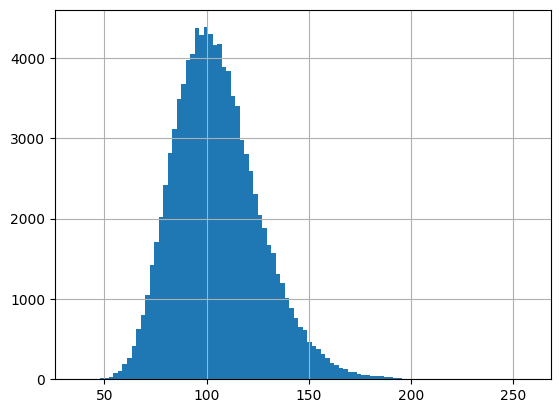

In [7]:
df_Euler_Maruyama_simulation.iloc[-1].hist(bins=100)

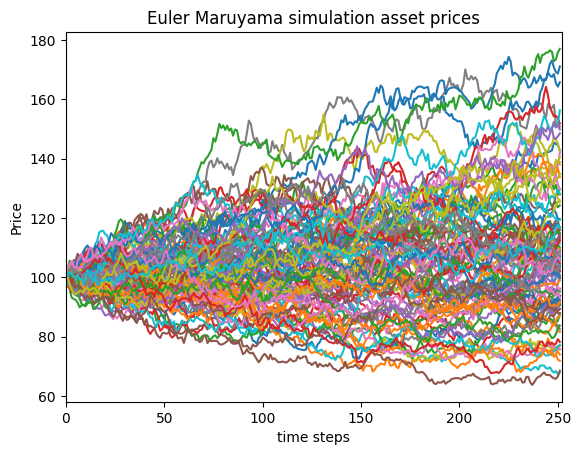

In [8]:
plt.plot(df_Euler_Maruyama_simulation.iloc[:,:100])
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('Price')
plt.title('Euler Maruyama simulation asset prices');

**[Back to Menu](#menu)**

<a id="212"></a>
### 2.1.2 Calcualte the option prices and standard error with default parameters (Euler-Maruyama) ###

<a id="2121"></a>
#### 2.1.2.1 European call option price and standard error with the default parameters ####

Under risk neutrality, the price of an option using a Monte Carlo simulation is the expected value of its future payoff. At the same time, in the risk-neutral world, the asset is supposed to earn risk-free interest rate on average. Consequently, for an option with maturity $T$, its value at time $t$ would be the discounted value of the expected payoff.

The European call option payoff function:
$$ C_{eu} = e^{−r(T−t)}E[max (0,S_T-E)]$$

In [9]:
#simulate again to have the result in an array
S_EM_default = Euler_Maruyama_simulation(S0,r,sigma,T,n,N)

In [10]:
#calculate the payoff of the simulations
Payoff_eu_EM_default = np.maximum(0, S_EM_default[-1]-E)

In [11]:
#use the average payoff as the expected payoff and substitute it in the option price function
C_eu_EM_default = np.exp(-r*T) * np.mean(Payoff_eu_EM_default)
print(f"With Euler Maruyama simulation and the default parameters, the European call option value is {C_eu_EM_default:0.4f}.")

With Euler Maruyama simulation and the default parameters, the European call option value is 10.4811.


As for the error analysis, because we simulate a finite amount of an infinite number of possible paths, the standard error <sup>[[1](#ref1)]</sup> due to using $N$ realizations of the asset price paths after being discounuted is:
$$ O(N^{-\frac{1}{2}}) = \frac{{\sigma}_{payoff}}{\sqrt{N}}$$
where ${\sigma}_{payoff}$ is the standard deviation of the discounted payoffs.

In [12]:
#calculate the standard error
O_eu_EM_default = np.std(np.exp(-r*T)*Payoff_eu_EM_default)/np.sqrt(N)
print(f"With Euler Maruyama simulation and the default parameters, the European call option standard error is {O_eu_EM_default:0.5f}.")

With Euler Maruyama simulation and the default parameters, the European call option standard error is 0.04643.


<a id="2122"></a>
#### 2.1.2.2 Binary call option price and standard error with the default parameters ####

The Binary call option payoff function:
$$ C_{bi} = e^{−r(T−t)}P(S_T>E)$$

In [13]:
#calculate the payoff of the simulations
Payoff_bi_EM_default = np.where(S_EM_default[-1] > E, 1, 0)

In [14]:
#substitute the average payoff in the option price function
C_bi_EM_default = np.exp(-r*T) * np.mean(Payoff_bi_EM_default)
print(f"With Euler Maruyama simulation and the default parameters, the Binary call option value is {C_bi_EM_default:0.4f}.")

With Euler Maruyama simulation and the default parameters, the Binary call option value is 0.5350.


In [15]:
#calculate the standard error
O_bi_EM_default =  np.std(np.exp(-r*T)*Payoff_bi_EM_default)/np.sqrt(N)
print(f"With Euler Maruyama simulation and the default parameters, the Binary call option standard error is {O_bi_EM_default:0.6f}.")

With Euler Maruyama simulation and the default parameters, the Binary call option standard error is 0.001492.


**[Back to Menu](#menu)**

<a id="213"></a>
### 2.1.3 Further analysis on option price with varied parameters (Euler-Maruyama) ###

Let's recap the default parameters:
- Today's stock price: $S_0 = 100$
- Strike: $E = 100$
- Time to expiry: $(T - t) = 1$ year, and consider there are n = 252 trading days in the year.
- Volatility:  $ \sigma = 20\%$
- Constant risk-free interest rate: $r = 5\%$

while the simulation times $N = 100000$.

To start the analysis, set up the range of the varied parameter:
- Today's stock price: $S_0 = 100$. This parameter will not change.
- Strike: $E$ will vary from $80$ to $120$ at the step of five: $80$, $85$, $90$, $95$, $100$, $105$, $110$, $115$, $120$. 
- Time to expiry: $(T - t)$ will vary from $0$ (not included) to $1$ at the step of $\frac{1}{12}$, so each step will mean one month. And the trading days $n$ will adjust accordingly.
- Volatility:  $ \sigma$ will vary from $5\%$ to $50\%$ at the step of five percentage points: $5\%$, $10\%$, $15\%$, $20\%$, $25\%$, $30\%$, $35\%$, $40\%$.
- Constant risk-free interest rate: $r$ will vary from $1\%$ to $10\%$ at the step of one percentage point: $1\%$, $2\%$, $3\%$, $4\%$, $5\%$, $6\%$, $7\%$, $8\%$, $9\%$, $10\%$.

while the simulation times $N = 100000$ will not be changed.

In [16]:
list_strike = [80, 85, 95, 100, 105, 110, 115, 120]
list_Time_to_expiry = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
list_volatility = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
list_rate = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

As you can se, we use today's stock price as an anchor, and vary the key parameters in a reasonable range with around ten values each, to observe their impacts to the option price.<br>
Meanwhile, to be more efficient, I will pair two varied parameters for one set of simulation together, and put the result in a dataframe. This will also help use to see the joint impacts on the option price.

Relevant visualization will be provided for intuitive illustration.

In [17]:
# create lists to store the figures generated on the go.
list_eu_figures = []
list_bi_figures = []

<a id="2131"></a>
#### 2.1.3.1 European call option price with varied parameters - simulation, calculation and visualization ####

Create European option price function whichs cover both simulation and option price calculation. The inputs will be the parameters and the output will be directly the option price.

In [18]:
def Euler_Maruyama_eu_price(spot, mu, sigma, horizon, time_steps, sim_times, strike):
    
    # set random seed
    np.random.seed(seed)

    # define dt
    dt = horizon/time_steps
    
    # simulate path
    S = np.zeros((time_steps,sim_times))
    S[0] = spot
    
    for i in range(0, time_steps-1):
        w = np.random.standard_normal(sim_times)
        S[i+1] = S[i] * (1+ mu*dt + sigma*np.sqrt(dt)*w)
    
    Payoff_eu_EM = np.maximum(0, S[-1]-strike)
    
    C_eu_EM = np.exp(-mu*horizon) * np.mean(Payoff_eu_EM)
    
    return C_eu_EM

<b>Task 1: Visualize impacts from strike price and time to expiry to European call option price.</b><br>
Create the simulation dataframe.

In [19]:
df_Euler_Maruyama_eu_strike_time = pd.DataFrame([[Euler_Maruyama_eu_price(S0, r, sigma, T*T_varied/12, int(n*T_varied/12), N, E_varied) for E_varied in list_strike] for T_varied in list_Time_to_expiry],
                                               index=list_Time_to_expiry,
                                               columns=list_strike)
df_Euler_Maruyama_eu_strike_time

80         85         95         100       105       110       115  \
1   20.341147  15.364438   5.880593   2.472568  0.710021  0.134427  0.016678   
2   20.696341  15.779561   6.855178   3.646720  1.629925  0.606492  0.186056   
3   21.037760  16.212738   7.695278   4.586738  2.450103  1.167186  0.494755   
4   21.394162  16.675743   8.459609   5.403204  3.192042  1.740099  0.880312   
5   21.782482  17.164251   9.180716   6.157590  3.881676  2.304036  1.289871   
6   22.171941  17.641948   9.850282   6.861322  4.550175  2.877792  1.736890   
7   22.563188  18.119213  10.479975   7.507456  5.161844  3.410647  2.166769   
8   22.978410  18.609178  11.110948   8.164840  5.795011  3.969670  2.630411   
9   23.414357  19.117342  11.726386   8.787558  6.389370  4.516068  3.105988   
10  23.830372  19.595344  12.297377   9.373721  6.961220  5.042526  3.566987   
11  24.264776  20.086773  12.871421   9.952449  7.523349  5.562901  4.025037   
12  24.658879  20.533102  13.389615  10.481120  8.039274  6.046070  4.465283   

         120  
1   0.001618  
2   0.047400  
3   0.188540  
4   0.414665  
5   0.683998  
6   1.000592  
7   1.328622  
8   1.688795  
9   2.079526  
10  2.462473  
11  2.855378  
12  3.242183

Visulize the result in the 3D space.

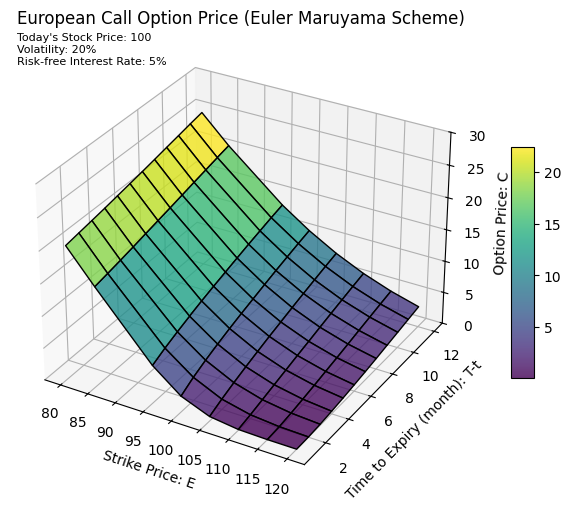

In [20]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for plotting
X, Y = np.meshgrid(df_Euler_Maruyama_eu_strike_time.columns, df_Euler_Maruyama_eu_strike_time.index) 
Z = df_Euler_Maruyama_eu_strike_time.values
# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Add labels and title
ax.set_xlabel('Strike Price: E')
ax.set_ylabel('Time to Expiry (month): T-t')
ax.set_zlabel('Option Price: C')
ax.set_zlim(0, 30)  # Set z-axis range: Min=0, Max=30
ax.set_title('European Call Option Price (Euler Maruyama Scheme)')
ax.text2D(0.015, 0.93, "Today's Stock Price: 100\nVolatility: 20%\nRisk-free Interest Rate: 5%",
          transform=ax.transAxes, ha='left', fontsize=8)
# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

# Store the figure on the go
list_eu_figures.append(fig)

# Show the plot
plt.show()

<b> Task 2: Visualize impacts from volatility and time to expiry to European call option price.</b><br>
Create the simulation dataframe.

In [21]:
df_Euler_Maruyama_eu_volatility_time = pd.DataFrame([[Euler_Maruyama_eu_price(S0, r, sigma_varied, T*T_varied/12, int(n*T_varied/12), N, E) for sigma_varied in list_volatility] for T_varied in list_Time_to_expiry],
                                               index=list_Time_to_expiry,
                                               columns=list_volatility)
df_Euler_Maruyama_eu_volatility_time

0.05      0.10      0.15       0.20       0.25       0.30       0.35  \
1   0.787738  1.343862  1.907243   2.472568   3.038728   3.605331   4.172194   
2   1.277533  2.051377  2.846453   3.646720   4.448963   5.252135   6.055675   
3   1.717337  2.645495  3.611244   4.586738   5.565827   6.546499   7.527580   
4   2.135872  3.181617  4.285036   5.403204   6.527003   7.652941   8.779414   
5   2.546146  3.690779  4.914454   6.157590   7.407464   8.660045   9.913203   
6   2.945180  4.173667  5.504709   6.861322   8.227543   9.597603  10.968422   
7   3.339179  4.633222  6.053613   7.507456   8.972598  10.441281  11.910221   
8   3.732676  5.095369  6.610334   8.164840   9.733195  11.306235  12.879031   
9   4.128585  5.546896  7.143654   8.787558  10.447543  12.113304  13.779546   
10  4.515292  5.978195  7.648950   9.373721  11.117663  12.869143  14.622121   
11  4.905829  6.411839  8.150910   9.952449  11.777582  13.612000  15.447504   
12  5.285828  6.819179  8.614743  10.481120  12.374076  14.276546  16.181044   

         0.40  
1    4.739244  
2    6.859258  
3    8.508536  
4    9.905629  
5   11.165598  
6   12.338051  
7   13.377111  
8   14.448992  
9   15.443630  
10  16.372207  
11  17.280048  
12  18.082506

Visulize the result in the 3D space.

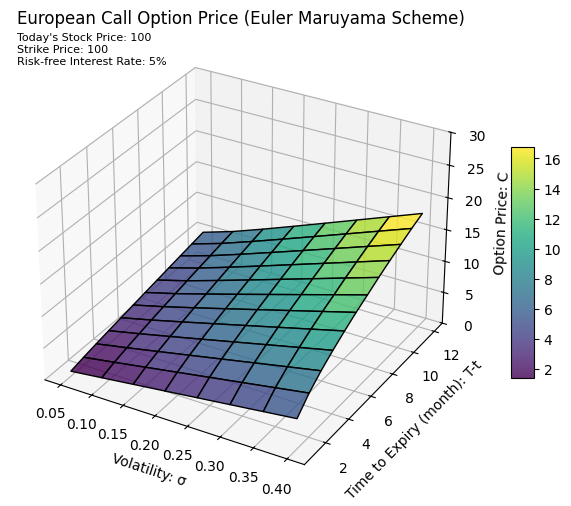

In [22]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for plotting
X, Y = np.meshgrid(df_Euler_Maruyama_eu_volatility_time.columns, df_Euler_Maruyama_eu_volatility_time.index) 
Z = df_Euler_Maruyama_eu_volatility_time.values
# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Add labels and title
ax.set_xlabel('Volatility: σ')
ax.set_ylabel('Time to Expiry (month): T-t')
ax.set_zlabel('Option Price: C')
ax.set_zlim(0, 30)  # Set z-axis range: Min=0, Max=30
ax.set_title('European Call Option Price (Euler Maruyama Scheme)')
ax.text2D(0.015, 0.93, "Today's Stock Price: 100\nStrike Price: 100\nRisk-free Interest Rate: 5%",
          transform=ax.transAxes, ha='left', fontsize=8)
# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

# Store the figure on the go
list_eu_figures.append(fig)

# Show the plot
plt.show()

<b> Task 3: Visualize impacts from risk-free interest rate and time to expiry to European call option price.</b><br>
Create the simulation dataframe.

In [23]:
df_Euler_Maruyama_eu_rate_time = pd.DataFrame([[Euler_Maruyama_eu_price(S0, rate_varied, sigma, T*T_varied/12, int(n*T_varied/12), N, E) for rate_varied in list_rate] for T_varied in list_Time_to_expiry],
                                               index=list_Time_to_expiry,
                                               columns=list_rate)
df_Euler_Maruyama_eu_rate_time

0.01      0.02      0.03      0.04       0.05       0.06       0.07  \
1   2.312331  2.351786  2.391645  2.431899   2.472568   2.513653   2.555139   
2   3.316952  3.397621  3.479459  3.562501   3.646720   3.732089   3.818589   
3   4.088968  4.210240  4.333604  4.459077   4.586738   4.716496   4.848301   
4   4.736492  4.898421  5.063491  5.231783   5.403204   5.577908   5.755727   
5   5.319191  5.522047  5.729349  5.941301   6.157590   6.378089   6.602573   
6   5.856094  6.098939  6.347422  6.601480   6.861322   7.126618   7.397193   
7   6.332903  6.616241  6.906569  7.203762   7.507456   7.817826   8.134709   
8   6.823583  7.146821  7.478209  7.817405   8.164840   8.520222   8.882995   
9   7.273029  7.637241  8.011169  8.394810   8.787558   9.189141   9.599654   
10  7.692940  8.096282  8.510876  8.936815   9.373721   9.820902  10.277883   
11  8.103226  8.546631  9.002656  9.471224   9.952449  10.445756  10.950558   
12  8.464219  8.947032  9.444455  9.956060  10.481120  11.019846  11.571168   

         0.08       0.09       0.10  
1    2.597044   2.639357   2.682061  
2    3.906194   3.994920   4.084768  
3    4.982153   5.118058   5.256034  
4    5.936568   6.120443   6.307393  
5    6.830980   7.063479   7.300025  
6    7.672989   7.953672   8.239140  
7    8.458221   8.788220   9.124350  
8    9.253470   9.631320  10.016127  
9   10.019026  10.446740  10.882456  
10  10.744311  11.220222  11.705529  
11  11.466331  11.992314  12.528629  
12  12.135005  12.709863  13.295731

Visulize the result in the 3D space.

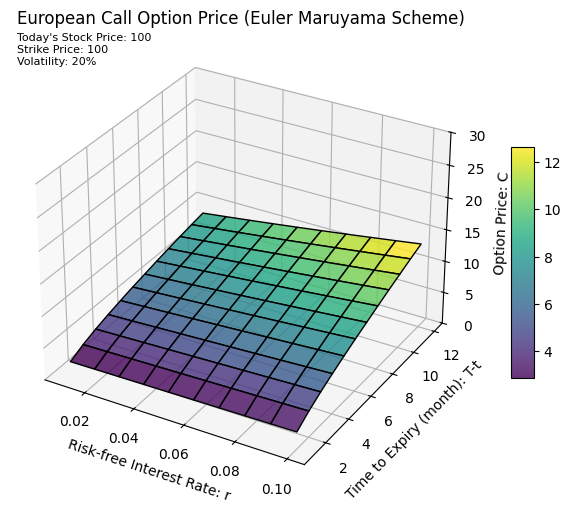

In [24]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for plotting
X, Y = np.meshgrid(df_Euler_Maruyama_eu_rate_time.columns, df_Euler_Maruyama_eu_rate_time.index) 
Z = df_Euler_Maruyama_eu_rate_time.values
# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Add labels and title
ax.set_xlabel('Risk-free Interest Rate: r')
ax.set_ylabel('Time to Expiry (month): T-t')
ax.set_zlabel('Option Price: C')
ax.set_zlim(0, 30)  # Set z-axis range: Min=0, Max=30
ax.set_title('European Call Option Price (Euler Maruyama Scheme)')
ax.text2D(0.015, 0.93, "Today's Stock Price: 100\nStrike Price: 100\nVolatility: 20%",
          transform=ax.transAxes, ha='left', fontsize=8)
# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

# Store the figure on the go
list_eu_figures.append(fig)

# Show the plot
plt.show()

<b> Task 4: Visualize impacts from risk-free interest rate and strike price to European call option price.</b><br>
Create the simulation dataframe.

In [25]:
df_Euler_Maruyama_eu_rate_strike = pd.DataFrame([[Euler_Maruyama_eu_price(S0, rate_varied, sigma, T, n, N, E_varied) for E_varied in list_strike] for rate_varied in list_rate],
                                               index=list_rate,
                                               columns=list_strike)
df_Euler_Maruyama_eu_rate_strike

80         85         95         100        105       110  \
0.01  21.944217  17.884828  11.105863   8.464219   6.313753  4.616622   
0.02  22.621095  18.539743  11.659318   8.947032   6.721568  4.950237   
0.03  23.299475  19.199659  12.225136   9.444455   7.145056  5.299807   
0.04  23.978952  19.864495  12.801884   9.956060   7.584311  5.664884   
0.05  24.658879  20.533102  13.389615  10.481120   8.039274  6.046070   
0.06  25.338458  21.204652  13.988278  11.019846   8.509015  6.443434   
0.07  26.017549  21.878658  14.597085  11.571168   8.993088  6.856169   
0.08  26.695550  22.555054  15.214937  12.135005   9.491782  7.284578   
0.09  27.371899  23.232966  15.840928  12.709863  10.004542  7.728920   
0.10  28.046270  23.912018  16.474803  13.295731  10.530774  8.188628   

           115       120  
0.01  3.313938  2.337917  
0.02  3.579456  2.543782  
0.03  3.859881  2.762820  
0.04  4.154953  2.995297  
0.05  4.465283  3.242183  
0.06  4.791431  3.503505  
0.07  5.133427  3.779705  
0.08  5.491225  4.070758  
0.09  5.864603  4.376529  
0.10  6.254444  4.698231

Visulize the result in the 3D space.

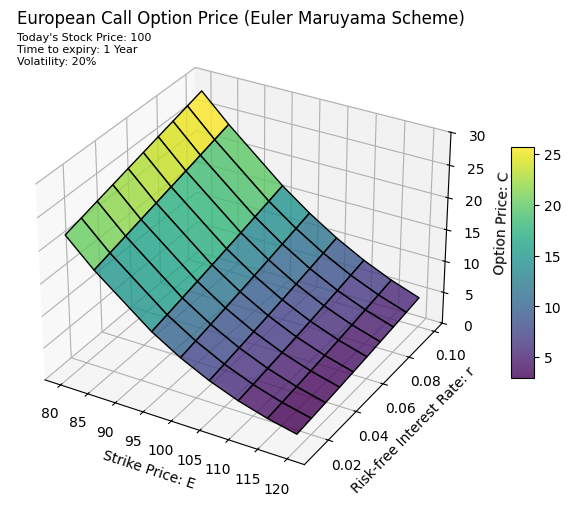

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for plotting
X, Y = np.meshgrid(df_Euler_Maruyama_eu_rate_strike.columns, df_Euler_Maruyama_eu_rate_strike.index) 
Z = df_Euler_Maruyama_eu_rate_strike.values
# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Add labels and title
ax.set_xlabel('Strike Price: E')
ax.set_ylabel('Risk-free Interest Rate: r')
ax.set_zlabel('Option Price: C')
ax.set_zlim(0, 30)  # Set z-axis range: Min=0, Max=30
ax.set_title('European Call Option Price (Euler Maruyama Scheme)')
ax.text2D(0.015, 0.93, "Today's Stock Price: 100\nTime to expiry: 1 Year\nVolatility: 20%",
          transform=ax.transAxes, ha='left', fontsize=8)
# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

# Store the figure on the go
list_eu_figures.append(fig)

# Show the plot
plt.show()

<b> Task 5: Visualize impacts from risk-free interest rate and volatility to European call option price.</b><br>
Create the simulation dataframe.

In [27]:
df_Euler_Maruyama_eu_rate_volatility = pd.DataFrame([[Euler_Maruyama_eu_price(S0, rate_varied, sigma_varied, T, n, N, E) for rate_varied in list_rate] for sigma_varied in list_volatility],
                                               index=list_volatility,
                                               columns=list_rate)
df_Euler_Maruyama_eu_rate_volatility

0.01       0.02       0.03       0.04       0.05       0.06  \
0.05   2.529720   3.128576   3.793130   4.515227   5.285828   6.094974   
0.10   4.501051   5.032850   5.597780   6.193864   6.819179   7.472633   
0.15   6.482842   6.985428   7.508605   8.052006   8.614743   9.196006   
0.20   8.464219   8.947032   9.444455   9.956060  10.481120  11.019846   
0.25  10.441564  10.909051  11.386892  11.875311  12.374076  12.882762   
0.30  12.413141  12.867085  13.329121  13.798892  14.276546  14.761966   
0.35  14.377500  14.818929  15.266870  15.720963  16.181044  16.647039   
0.40  16.333785  16.763003  17.197768  17.637749  18.082506  18.531983   

           0.07       0.08       0.09       0.10  
0.05   6.933650   7.792322   8.663573   9.541323  
0.10   8.150760   8.851724   9.572773  10.311850  
0.15   9.794221  10.409425  11.040720  11.686046  
0.20  11.571168  12.135005  12.709863  13.295731  
0.25  13.400947  13.928815  14.465367  15.010751  
0.30  15.254990  15.755211  16.262333  16.776487  
0.35  17.119051  17.596802  18.080259  18.569135  
0.40  18.985903  19.444459  19.907532  20.374909

Visulize the result in the 3D space.

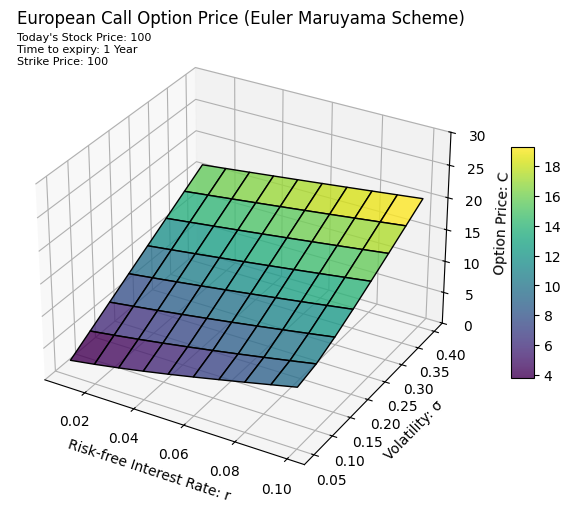

In [28]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for plotting
X, Y = np.meshgrid(df_Euler_Maruyama_eu_rate_volatility.columns, df_Euler_Maruyama_eu_rate_volatility.index) 
Z = df_Euler_Maruyama_eu_rate_volatility.values
# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Add labels and title
ax.set_xlabel('Risk-free Interest Rate: r')
ax.set_ylabel('Volatility: σ')
ax.set_zlabel('Option Price: C')
ax.set_zlim(0, 30)  # Set z-axis range: Min=0, Max=30
ax.set_title('European Call Option Price (Euler Maruyama Scheme)')
ax.text2D(0.015, 0.93, "Today's Stock Price: 100\nTime to expiry: 1 Year\nStrike Price: 100",
          transform=ax.transAxes, ha='left', fontsize=8)
# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

# Store the figure on the go
list_eu_figures.append(fig)

# Show the plot
plt.show()

<b> Task 6: Visualize impacts from volatility and strike price to European call option price.</b><br>
Create the simulation dataframe.

In [29]:
df_Euler_Maruyama_eu_volatility_strike = pd.DataFrame([[Euler_Maruyama_eu_price(S0, r, sigma_varied, T, n, N, E_varied) for E_varied in list_strike] for sigma_varied in list_volatility],
                                               index=list_volatility,
                                               columns=list_strike)
df_Euler_Maruyama_eu_volatility_strike

80         85         95         100        105        110  \
0.05  23.908481  19.152372   9.676529   5.285828   2.051389   0.503616   
0.10  23.943177  19.230984  10.427818   6.819179   4.050346   2.170312   
0.15  24.131587  19.669993  11.788402   8.614743   6.046752   4.076471   
0.20  24.658879  20.533102  13.389615  10.481120   8.039274   6.046070   
0.25  25.497475  21.682046  15.099113  12.374076  10.026547   8.038427   
0.30  26.559903  23.008002  16.860777  14.276546  12.007516  10.038316   
0.35  27.775112  24.443552  18.650209  16.181044  13.981151  12.038557   
0.40  29.093876  25.953100  20.453456  18.082506  15.946664  14.034956   

            115        120  
0.05   0.073095   0.006844  
0.10   1.049232   0.455302  
0.15   2.644983   1.653968  
0.20   4.465283   3.242183  
0.25   6.382178   5.023194  
0.30   8.345933   6.905046  
0.35  10.332895   8.844226  
0.40  12.330602  10.816220

Visulize the result in the 3D space.

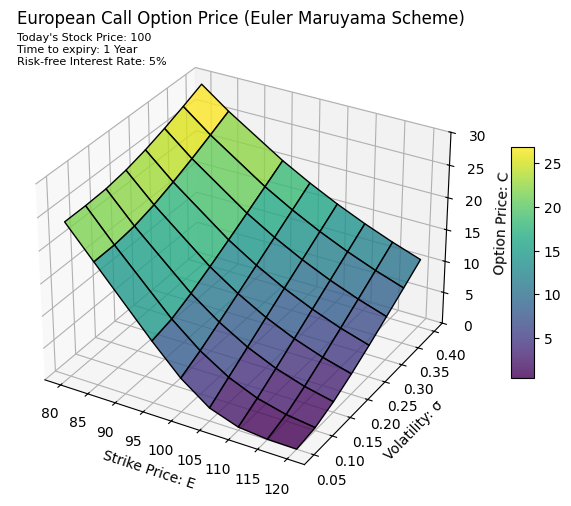

In [30]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for plotting
X, Y = np.meshgrid(df_Euler_Maruyama_eu_volatility_strike.columns, df_Euler_Maruyama_eu_volatility_strike.index) 
Z = df_Euler_Maruyama_eu_volatility_strike.values
# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Add labels and title
ax.set_xlabel('Strike Price: E')
ax.set_ylabel('Volatility: σ')
ax.set_zlabel('Option Price: C')
ax.set_zlim(0, 30)  # Set z-axis range: Min=0, Max=30
ax.set_title('European Call Option Price (Euler Maruyama Scheme)')
ax.text2D(0.015, 0.93, "Today's Stock Price: 100\nTime to expiry: 1 Year\nRisk-free Interest Rate: 5%",
          transform=ax.transAxes, ha='left', fontsize=8)
# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

# Store the figure on the go
list_eu_figures.append(fig)

# Show the plot
plt.show()

**[Back to Menu](#menu)**

<a id="2132"></a>
#### 2.1.3.2 European call option price with varied parameters - analysis and observation ####

Put all six images from the Euler-Maruyama Scheme together and label them as Figures 1 to 6 to facilitate subsequent analysis.


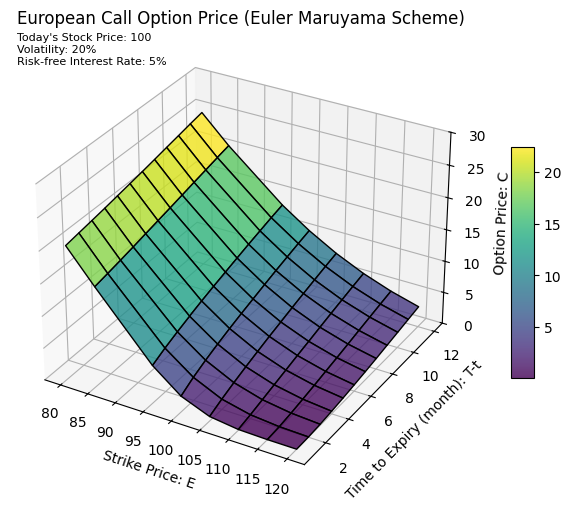
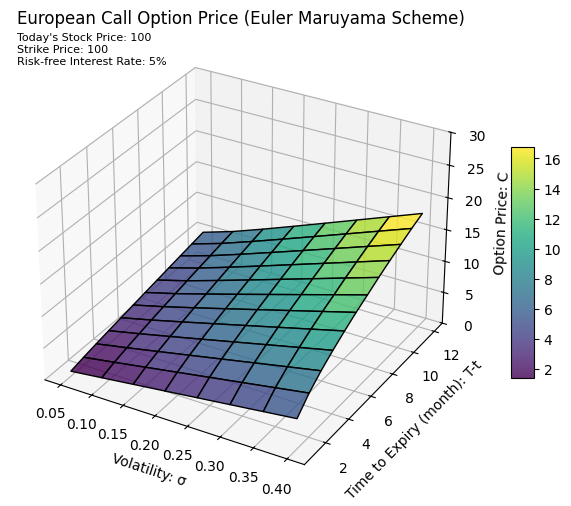
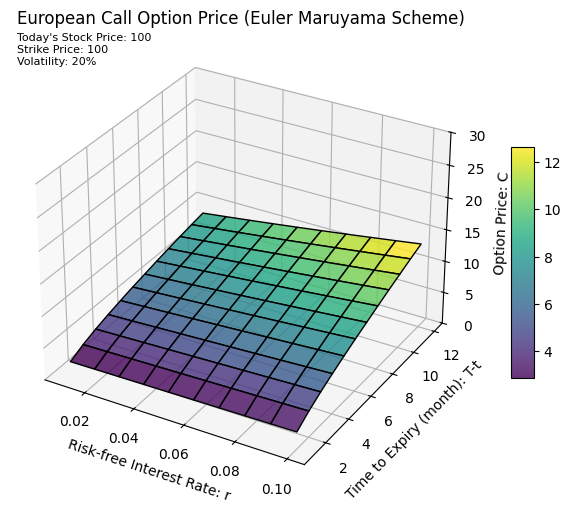
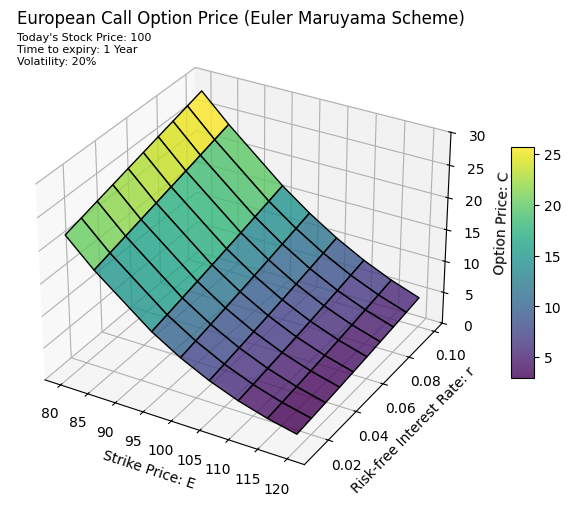
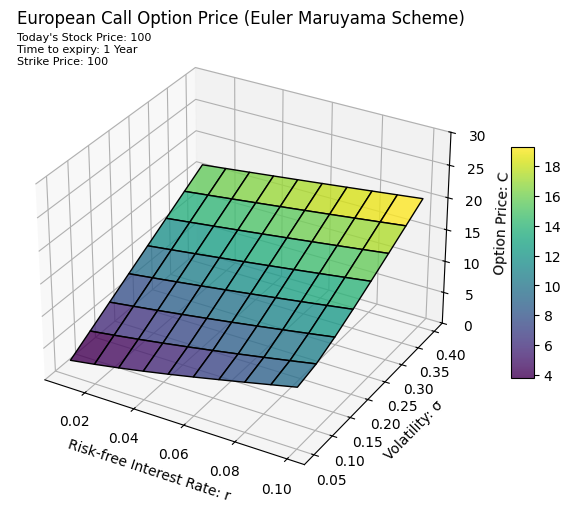
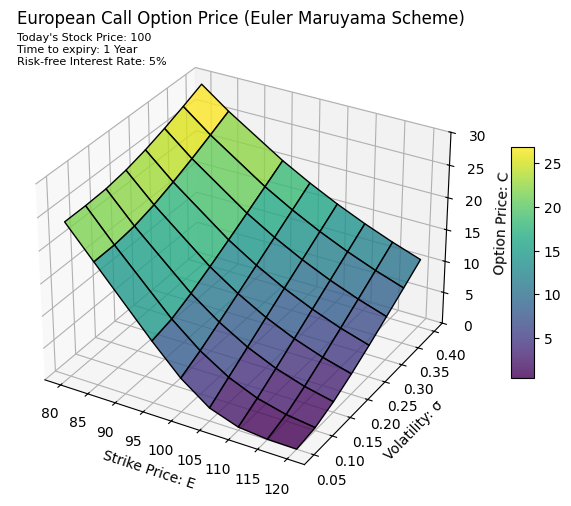

In [31]:
# Convert each figure to a base64-encoded image
def fig_to_html_combined(fig, caption=""):
    buf = BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    img_base64 = base64.b64encode(buf.read()).decode('utf-8')
    
    # Wrap image and caption in a vertical box
    html = f"""
    <div style="margin:10px; text-align: center;">
        <img src="data:image/png;base64,{img_base64}" style="width: 400px; display:block; margin:auto;" />
        <div style="margin-top:5px; font-size:14px; color:#333;">{caption}</div>
    </div>
    """
    return html

#add captions for each figure for the ease in the discussion
captions = [f"Figure {i+1}" for i in range(len(list_eu_figures))]

# Arrange the 6 images into 2x3 layout
rows = []

for i in range(0, len(list_eu_figures), 3):
    row = ''.join([fig_to_html_combined(fig, captions[j]) for j, fig in enumerate(list_eu_figures[i:i+3], start=i)])
    rows.append(f"<div style='display:flex; justify-content:center'>{row}</div>")

# Display HTML
display(HTML(''.join(rows)))

Recall the Black-Scholes formula for European call options:
$$ C = S_0N(d_1) - Ee^{-r(T-t)}N(d_2)$$
where
$$d_1 = \frac{log(\frac{S_0}{E}) + (r+\frac{{\sigma}^2}{2})(T-t)}{{\sigma}{\sqrt{T-t}}}$$
$$d_2 = d_1 - {\sigma}{\sqrt{T-t}} $$
N(⋅) is the cumulative distribution function (CDF) of the standard normal distribution. <br>
Referring this formula, I will analyze one parameter at a time and display the corresponding figures before each analysis. 

<b>For strik price $E$:</b>


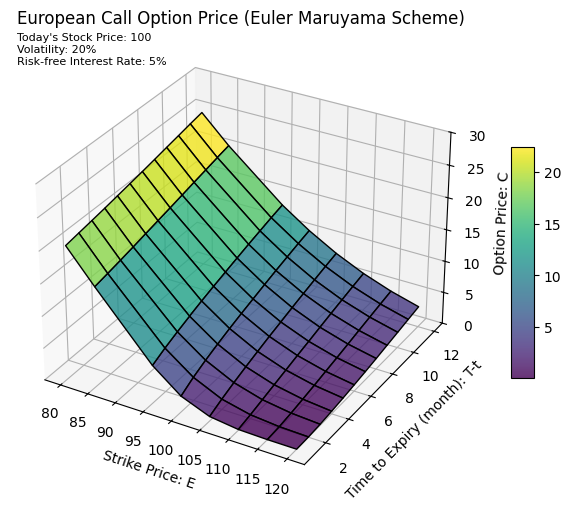
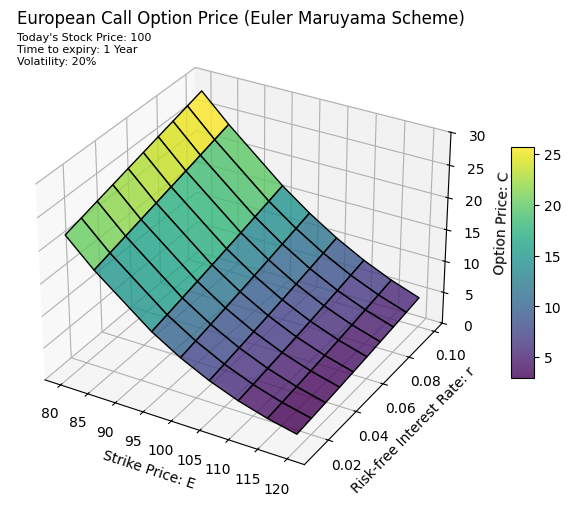
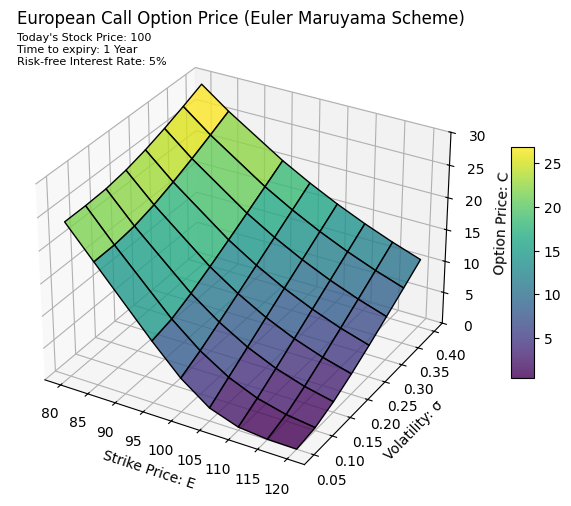

In [32]:
#Display the figures relevant to strike price
selected_indices = [0, 3, 5]

# Add captions for each selected figure
captions = [f"Figure {i+1}" for i in selected_indices]

# Create HTML for the selected figures only
rows = ''.join([fig_to_html_combined(list_eu_figures[i], captions[j]) for j, i in enumerate(selected_indices)])

# Wrap the selected figures in a single row layout
html = f"<div style='display:flex; justify-content:center'>{rows}</div>"
display(HTML(html))

1. <b>Negative relevancy between $E$ and $C$:</b> When strike price $E$ increases and other parameters remain the same, $log(\frac{S_0}{E})$ decreases, thus $d_1$, $d_2$, $N(d_1)$ and $N(d_2)$ decrease. But the decrease of $Ee^{-r(T-t)}N(d_2)$ is mitigated by the increase of $E$. Therefore, $C$ which is the gap between $Ee^{-r(T-t)}N(d_2)$ and $S_0N(d_1)$, should be smaller, meaning a negative relevancy between $E$ and $C$. As shown in Figure 1, 4, 6, the slopes between $E$ and $C$ are always negative.
2. <b>Impact of size of $E$:</b> Following bullet point 1, for $E$ with different values, when they increase by the same amount, the bigger the value of $E$, the smaller the change (a.k.a the percentage of the increase amount to $E$), and consequently, the smaller the impact of $Ee^{-r(T-t)}N(d_2)$ for calculating $C$. Therefore, as $E$ increases, $C$ will decrease slower. As shown in Figure 1, 4, 6, when $E$ increases, the slope of the $C$ decreases gentler.</b> 
3. <b>Impact of $(T-t)$:</b> If time to expiry $(T-t)$ is not constant and increases, the gap between $d_1$ and $d_2$ which is ${\sigma}{\sqrt{T-t}}$ widens. Then, in the calculation of $C$, $S_0$ will multiply a value that will be growingly bigger than the value that $E$ multiplies, and $e^{-r(T-t)}$ which is the other value that $E$ multiplies is also diminishing. In this way, $C$ tends to become bigger. Therefore as $(T-t)$ increases, the negative relevancy between $E$ and $C$ will be reduced, as indicated in Figure 1 by the slopes that gradually flatten.
4. <b>Impact of $r$:</b> If risk-free interest rate $r$ is not constant, a higher $r$ will offset the dominance of $Ee^{-r(T-t)}N(d_2)$ when calculating $C$ as $e^{-r(T-t)}$ is smaller. This makes the sensitivity of $C$ to $E$ slightly weaker. Thus when $r$ increases, the negative relevancy between $E$ and $C$ will be reduced, as indicated in Figure 4 by the slopes that gradually flatten.</b>
5. <b>Impact of $\sigma$:</b> If volatility $\sigma$ is not constant and increases, as the increase of $(r+\frac{{\sigma}^2}{2})(T-t)$ mitigates the decrease of $log(\frac{S_0}{E})$, leading to smaller reduction of $d_1$, $d_2$, $N(d_1)$ and $N(d_2)$. Again, the dominance of $Ee^{-r(T-t)}N(d_2)$ when calculating $C$ will become smaller, as the change of $E$ needs to affect larger numbers. This makes the sensitivity of the $C$ to the $E$ weaker. Therefore, as $\sigma$ increase, the negative relevancy between $E$ and $C$ will be reduced, evident from the increasingly flatter slopes in Figure 6.
6. <b>In summary, for European call options, strike price $E$ and option price $C$ are negatively relevant. But the negative relevancy will be weakened when strike price $E$ itself, time to expiry $(T-t)$, risk-free interest rate $r$ or volatility $\sigma$ increases.</b>

<b>For volatility $\sigma$:</b>


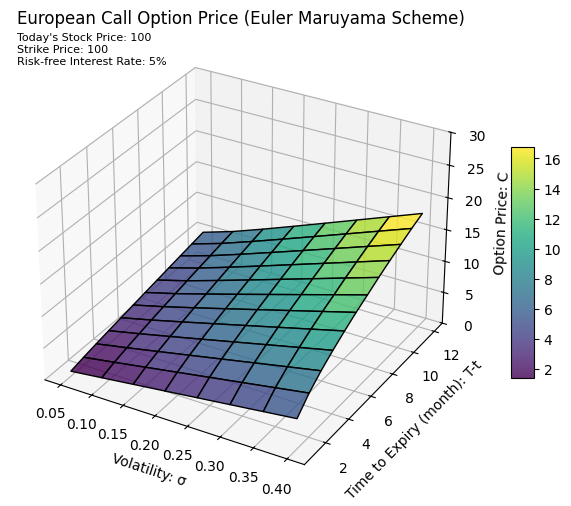
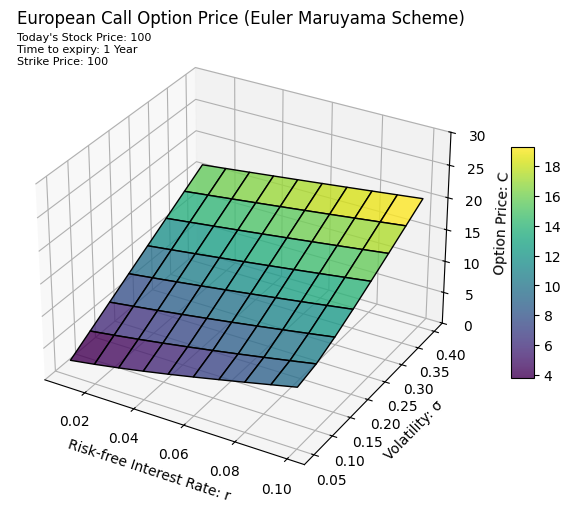
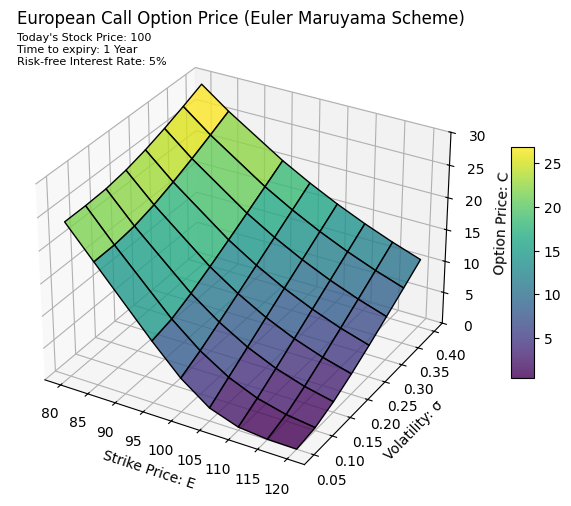

In [33]:
#Display the figures relevant to volitility
selected_indices = [1, 4, 5]

# Add captions for each selected figure
captions = [f"Figure {i+1}" for i in selected_indices]

# Create HTML for the selected figures only
rows = ''.join([fig_to_html_combined(list_eu_figures[i], captions[j]) for j, i in enumerate(selected_indices)])

# Wrap the selected figures in a single row layout
html = f"<div style='display:flex; justify-content:center'>{rows}</div>"
display(HTML(html))

Consider the sensivity of European call option price $C$ to volativity $\sigma$: 
$$\nu = S_0 \sqrt{T-t} N'(d_1).$$
N'(⋅) is the probability density function (PDF) of the standard normal distribution. <br>
1. <b>Positive relevancy between $\sigma$ and $C$: </b> All the components in $\nu$ are positive, which makes $\nu$ postive as well. Therefore, volativity $\sigma$ and option price $C$ are positively relevant. As shown in Figure 2, 5, 6, the slopes between them consistently head upwards.
2. <b>Impact of $(T-t)$:</b> If time to expiry $(T-t)$ increases, $d_1$ will increase, but $N'(d_1)$ will decrease since $d_1 > 0$. As intuitively, time amplifies volatility's power, $(T-t)$ should dominate the calculation and $\nu$ will increase eventually. This strengthens the positive relevancy between $\sigma$ and $C$. In Figure 2, the increase of $(T-t)$ steepens the slopes between $\sigma$ and $C$.
3. <b>Impact of $r$:</b> If risk-free interest rate $r$ increases, $d_1$ will increase. Again, $N'(d_1)$ decreases as $d_1 > 0$, so does $\nu$. But $r$ has a small impact on $d_1$, the decrease of $\nu$ should also be minimal. Accordingly, this slightly weakens the positive relevancy between $\sigma$ and $C$. In Figure 5, when $r$ increases, the positive slopes between $\sigma$ and $C$ flatten, but the changes are almost unnoticed.
4. <b>Impact of $E$:</b> If strike price $E$ increases, $log(\frac{S_0}{E})$ and then $d_1$ become smaller. But this time, $d_1$ has a chance to become negative as $E$ increases. Therefore $N'(d_1)$ will increase first then decrease, so will $\nu$. Intuitively, $E$ maximizes the power of $\sigma$ when it's near $S_0$ as it's the easiest place to finish ITM. In Figure 6, as $E$ increases, the positive relationship between $\sigma$ and $C$ strengthens initially, peaks around $E = 105$ with the steepest slopes, and gradually weakens afterward.
5. <b>In summary, for European call options, volatility $\sigma$ and option price $C$ are positively relevant. And $C$ will become more sensitive to volatility $\sigma$ when $(T-t)$ increases and slightly less sensitive when risk-free interest rate $r$ increases. When strike price $E$ increases, sensitivity first strengthens, peaks when $E$ is near $S_0$, and then weakens.</b>

<b>For time to expiry $(T-t)$:</b>


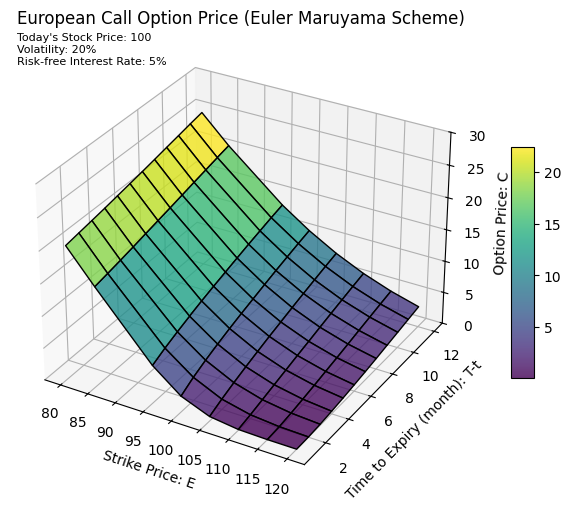
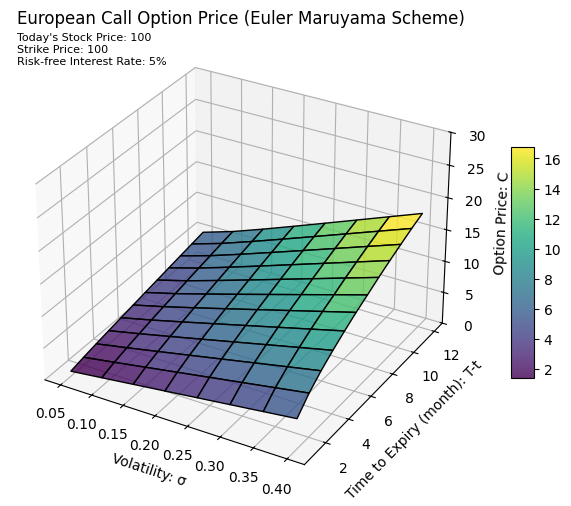
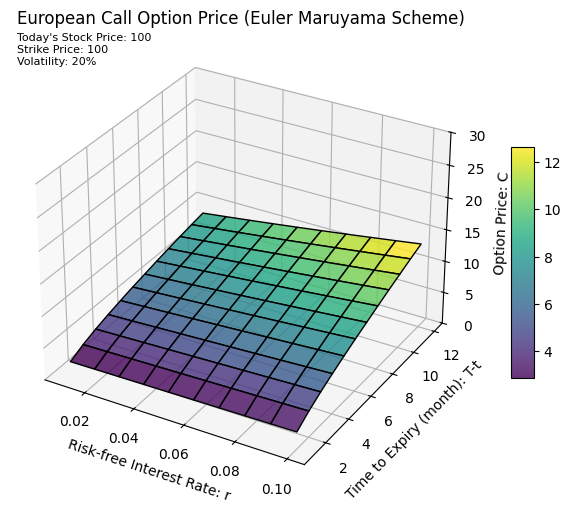

In [34]:
#Display on the figures time to expiry:
selected_indices = [0, 1, 2]

# Add captions for each selected figure
captions = [f"Figure {i+1}" for i in selected_indices]

# Create HTML for the selected figures only
rows = ''.join([fig_to_html_combined(list_eu_figures[i], captions[j]) for j, i in enumerate(selected_indices)])

# Wrap the selected figures in a single row layout
html = f"<div style='display:flex; justify-content:center'>{rows}</div>"
display(HTML(html))

Consider the sensivity of European call option price $C$ to time to expiry $(T-t)$ when there is no dividend paid: $$\Theta = -\frac{S_0 \sigma N'(d_1)}{2\sqrt{T-t}} - rE e^{-r(T-t)}N(d_2)$$
1. <b>Positive relevancy between $(T-t)$ and $C$: </b> Although $\Theta$ is negative, it means for one European call option, the value decreases as time passes. But for options designed with different maturities, the one with longer maturity has higher chance of ending ITM, so it has higher value too. Thus, time to expiry $(T-t)$ and option price $C$ are positively relevant. As shown in Figure 1, 2, 3, the slopes between them always trend upwards.
2. <b>Impact of $E$: </b>If strike price $E$ increases, $N'(d_1)$ and $N(d_2)$ decrease, and it's hard to tell how $\Theta$ moves from the formula. Intuitively, a higher $E$ reduces the likelihood to finish ITM, weakening the positive relevancy between $(T-t)$ and $C$. In Figure 1, increasing $E$ flattens the positive slopes between $(T-t)$ and $C$.
3. <b>Impact of $\sigma$: </b>If volatility $\sigma$ increases, $N'(d_1)$ and $N(d_2)$ will increase, and negative $\Theta$ will be even smaller, meaning the value decay for one option will become heavier. This adds more values to options designed with longer maturity. So, the increase of $\sigma$ strengthens the positive relevancy between $(T-t)$ and $C$. As shown in Figure 2, increasing $\sigma$ steepens the positive slopes between $(T-t)$ and $C$.
4. <b>Impact of $r$: </b> If risk-free interest rate $r$ increases, $N'(d_1)$ and $N(d_2)$ will increase, and negative $\Theta$ will be smaller again. Accordingly, this strengthens the positive relevancy between $(T-t)$ and $C$. In Figure 3, when $r$ increases, the positive slopes between $(T-t)$ and $C$ steepen.
8. <b>In summary, for European call options, time to expiry $(T-t)$ and option price $C$ are positively relevant. And the positive relevancy will be strengthened when risk-free interest rate $r$ or volatility $\sigma$ increases, but weakened when strike price $E$ increases.</b>

<b>For risk-free interest rate $r$:</b>


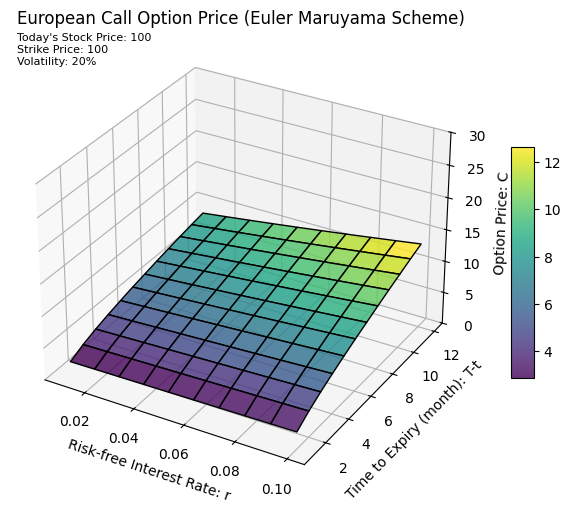
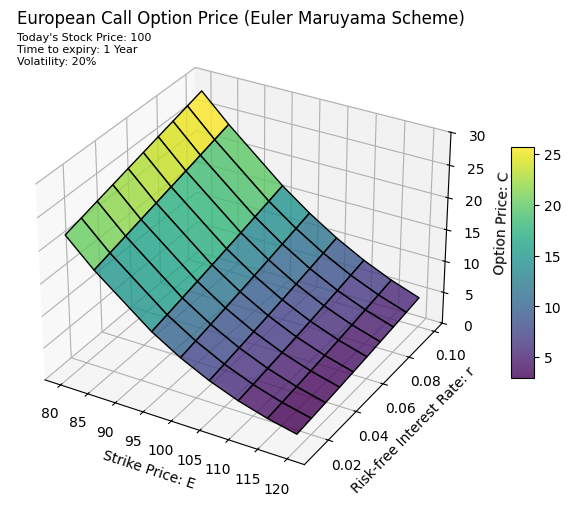
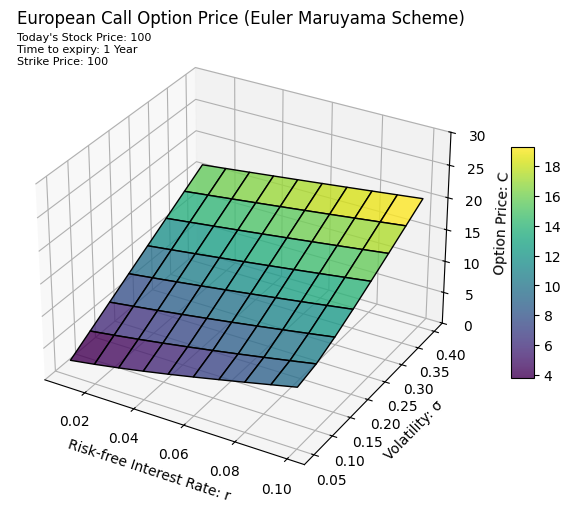

In [35]:
#Display on the figures relevant to risk-free interest rate:
selected_indices = [2, 3, 4]

# Add captions for each selected figure
captions = [f"Figure {i+1}" for i in selected_indices]

# Create HTML for the selected figures only
rows = ''.join([fig_to_html_combined(list_eu_figures[i], captions[j]) for j, i in enumerate(selected_indices)])

# Wrap the selected figures in a single row layout
html = f"<div style='display:flex; justify-content:center'>{rows}</div>"
display(HTML(html))

Consider the sensivity of European call option price $C$ to risk-free interest rate $r$: $$\rho = (T-t) E e^{-r(T-t)} N(d_2)$$
1. <b>Positive relevancy between $r$ and $C$: </b> All the components in $\rho$ are positive, which makes $\rho$ postive as well. Therefore, risk-free interest rate $r$ and option price $C$ are positively relevant. As shown in Figure 3, 4, 5, the slopes between them are always going upwards.
2. <b>Impact of $(T-t)$: </b> If time to expiry $(T-t)$ increases, $d_2$ and $N(d_2)$ will increase as well. In the formula of $rho$, two major component are increasing, only $e^{-r(T-t)}$ will decrease a bit. Generally speaking, $rho$ will increase. This means the increase of $(T-t)$ will strengthen the positive relevancy between $r$ and $C$. As shown in Figure 4, as $E$ increases, the positive slopes between $r$ and $C$ progressively steepen. 
3. <b>Impact of $E$: </b>If strike price $E$ increases, $log(\frac{S_0}{E})$ will decrese, and so will $d_2$ and $N(d_2)$. It's hard to tell whether $\rho$ will increase or not directly from the formula. But as shown in Figure 4, when $E$ increases, the positive slopes between $r$ and $C$ flatten, meaning $\rho$ is actually decreasing. Hence, the increase of $E$ weakens the positive relevancy between $r$ and $C$.
4. <b>Impact of $\sigma$: </b>If volatility $\sigma$ increases, $d_2$ and $N(d_2)$ will decrease, and so will $\rho$. This means the increase of volatility $\sigma$ will weaken the positive relevancy between $r$ and $C$. As shown in Figure 5, when $\sigma$ increases, the positive slopes between $r$ and $C$ tend to be flatter.
5. <b>In summary, for European call options, risk-free interest rate $r$ and option price $C$ are positively relevant. And the positive relevancy will be strengthened when time to expiry $(T-t)$ increases, but weakened when strike price $E$ or volatility $\sigma$ increases.</b>

**[Back to Menu](#menu)**

<a id="2133"></a>
#### 2.1.3.3 Binary call option price with varied parameters - simulation, calculation and visualization ####

Create Binary option price function whichs cover both simulation and option price calculation. The inputs will be the parameters and the output will be directly the option price.

In [36]:
def Euler_Maruyama_bi_price(spot, mu, sigma, horizon, time_steps, sim_times, strike):
    
    # set random seed
    np.random.seed(seed)

    # define dt
    dt = horizon/time_steps
    
    # simulate path
    S = np.zeros((time_steps,sim_times))
    S[0] = spot
    
    for i in range(0, time_steps-1):
        w = np.random.standard_normal(sim_times)
        S[i+1] = S[i] * (1+ mu*dt + sigma*np.sqrt(dt)*w)
    
    Payoff_bi_EM = np.where(S[-1] > strike, 1, 0)
    
    C_bi_EM = np.exp(-mu*horizon) * np.mean(Payoff_bi_EM)
    
    return C_bi_EM

<b> Task 7: Visualize impacts from strike price and time to expiry to Binary call option price.</b><br>
Create the simulation dataframe.

In [37]:
df_Euler_Maruyama_bi_strike_time = pd.DataFrame([[Euler_Maruyama_bi_price(S0, r, sigma, T*T_varied/12, int(n*T_varied/12), N, E_varied) for E_varied in list_strike] for T_varied in list_Time_to_expiry],
                                               index=list_Time_to_expiry,
                                               columns=list_strike)
df_Euler_Maruyama_bi_strike_time

80        85        95        100       105       110       115  \
1   0.995822  0.994059  0.825802  0.517589  0.206468  0.050698  0.007329   
2   0.989420  0.972552  0.752910  0.522855  0.291878  0.131033  0.047820   
3   0.978018  0.945497  0.715243  0.524740  0.334414  0.186948  0.090126   
4   0.962524  0.918975  0.693318  0.526767  0.360452  0.225431  0.125737   
5   0.946602  0.895224  0.677057  0.530580  0.382361  0.253396  0.156799   
6   0.931392  0.874755  0.664498  0.530569  0.395391  0.277388  0.184012   
7   0.915621  0.855957  0.656354  0.530956  0.407626  0.296563  0.204818   
8   0.903448  0.840453  0.646091  0.531688  0.417450  0.314132  0.224984   
9   0.888817  0.825573  0.641950  0.533244  0.425944  0.326032  0.240828   
10  0.876479  0.814429  0.635405  0.534173  0.431770  0.337462  0.255048   
11  0.865632  0.803038  0.632114  0.535094  0.437998  0.347426  0.268946   
12  0.854670  0.792916  0.627811  0.535000  0.442826  0.355826  0.278472   

         120  
1   0.000827  
2   0.013765  
3   0.038683  
4   0.065588  
5   0.090583  
6   0.115243  
7   0.134373  
8   0.154900  
9   0.172537  
10  0.188481  
11  0.201471  
12  0.213028

Visulize the result in the 3D space.

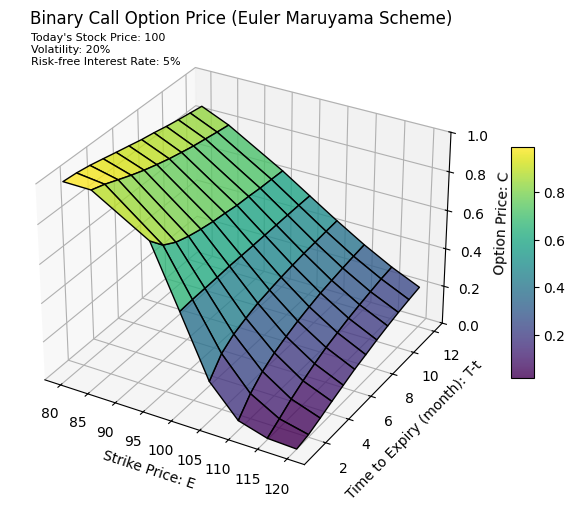

In [38]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for plotting
X, Y = np.meshgrid(df_Euler_Maruyama_bi_strike_time.columns, df_Euler_Maruyama_bi_strike_time.index) 
Z = df_Euler_Maruyama_bi_strike_time.values
# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Add labels and title
ax.set_xlabel('Strike Price: E')
ax.set_ylabel('Time to Expiry (month): T-t')
ax.set_zlabel('Option Price: C')
ax.set_zlim(0, 1)  # Set z-axis range: Min=0, Max=1
ax.set_title('Binary Call Option Price (Euler Maruyama Scheme)')
ax.text2D(0.045, 0.93, "Today's Stock Price: 100\nVolatility: 20%\nRisk-free Interest Rate: 5%",
          transform=ax.transAxes, ha='left', fontsize=8)
# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

# Store the figure on the go
list_bi_figures.append(fig)

# Show the plot
plt.show()

<b> Task 8: Visualize impacts from volatility and time to expiry to Binary call option price.</b><br>
Create the simulation dataframe.

In [39]:
df_Euler_Maruyama_bi_volatility_time = pd.DataFrame([[Euler_Maruyama_bi_price(S0, r, sigma_varied, T*T_varied/12, int(n*T_varied/12), N, E) for sigma_varied in list_volatility] for T_varied in list_Time_to_expiry],
                                               index=list_Time_to_expiry,
                                               columns=list_volatility)
df_Euler_Maruyama_bi_volatility_time

0.05      0.10      0.15      0.20      0.25      0.30      0.35  \
1   0.607703  0.550671  0.529649  0.517589  0.509035  0.502910  0.497672   
2   0.650526  0.570139  0.539952  0.522855  0.510994  0.501523  0.493709   
3   0.677952  0.583066  0.545805  0.524740  0.509689  0.498144  0.488782   
4   0.701913  0.593918  0.551501  0.526767  0.509959  0.496555  0.485599   
5   0.721207  0.603603  0.556759  0.530580  0.511561  0.496018  0.483874   
6   0.735823  0.609588  0.559594  0.530569  0.509122  0.493400  0.480126   
7   0.749391  0.617902  0.562793  0.530956  0.509433  0.492445  0.478032   
8   0.759535  0.621552  0.564109  0.531688  0.507692  0.490214  0.475232   
9   0.770170  0.628484  0.568294  0.533244  0.509491  0.490237  0.474113   
10  0.779437  0.632643  0.569797  0.534173  0.508006  0.487249  0.470876   
11  0.788413  0.638208  0.573579  0.535094  0.507193  0.486255  0.468698   
12  0.795266  0.643231  0.575180  0.535000  0.506787  0.484775  0.466131   

        0.40  
1   0.492763  
2   0.486906  
3   0.480427  
4   0.476010  
5   0.472914  
6   0.468900  
7   0.465930  
8   0.462291  
9   0.459839  
10  0.456095  
11  0.453434  
12  0.450322

Visulize the result in the 3D space.

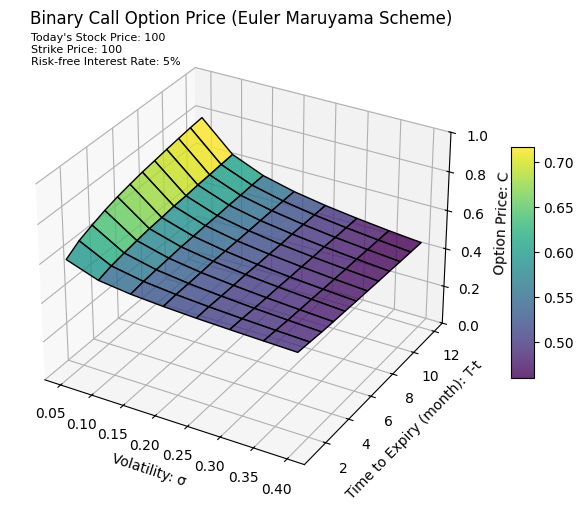

In [40]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for plotting
X, Y = np.meshgrid(df_Euler_Maruyama_bi_volatility_time.columns, df_Euler_Maruyama_bi_volatility_time.index) 
Z = df_Euler_Maruyama_bi_volatility_time.values
# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Add labels and title
ax.set_xlabel('Volatility: σ')
ax.set_ylabel('Time to Expiry (month): T-t')
ax.set_zlabel('Option Price: C')
ax.set_zlim(0, 1)  # Set z-axis range: Min=0, Max=1
ax.set_title('Binary Call Option Price (Euler Maruyama Scheme)')
ax.text2D(0.045, 0.93, "Today's Stock Price: 100\nStrike Price: 100\nRisk-free Interest Rate: 5%",
          transform=ax.transAxes, ha='left', fontsize=8)
# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

# Store the figure on the go
list_bi_figures.append(fig)

# Show the plot
plt.show()

<b> Task 9: Visualize impacts from risk-free interest rate and time to expiry to Binary call option price.</b><br>
Create the simulation dataframe.

In [41]:
df_Euler_Maruyama_bi_rate_time = pd.DataFrame([[Euler_Maruyama_bi_price(S0, rate_varied, sigma, T*T_varied/12, int(n*T_varied/12), N, E) for rate_varied in list_rate] for T_varied in list_Time_to_expiry],
                                               index=list_Time_to_expiry,
                                               columns=list_rate)
df_Euler_Maruyama_bi_rate_time

0.01      0.02      0.03      0.04      0.05      0.06      0.07  \
1   0.496816  0.502073  0.507051  0.512140  0.517589  0.522750  0.527872   
2   0.494016  0.501157  0.508441  0.515850  0.522855  0.530142  0.536870   
3   0.489964  0.498461  0.507023  0.515796  0.524740  0.533123  0.541530   
4   0.487981  0.497711  0.507163  0.516912  0.526767  0.536375  0.545912   
5   0.487056  0.497983  0.509146  0.520070  0.530580  0.540244  0.550245   
6   0.485059  0.496124  0.507855  0.519211  0.530569  0.541247  0.551815   
7   0.483859  0.496118  0.508080  0.519437  0.530956  0.542294  0.553933   
8   0.482552  0.494897  0.506684  0.518994  0.531688  0.542846  0.554271   
9   0.482220  0.495442  0.508851  0.521265  0.533244  0.545368  0.557215   
10  0.480489  0.493968  0.507863  0.521213  0.534173  0.546196  0.557785   
11  0.479594  0.493872  0.506955  0.521224  0.535094  0.547381  0.560093   
12  0.478135  0.492756  0.507465  0.521161  0.535000  0.547956  0.560835   

        0.08      0.09      0.10  
1   0.533273  0.538387  0.543185  
2   0.543988  0.550707  0.557491  
3   0.549686  0.558140  0.566792  
4   0.555040  0.564460  0.573211  
5   0.559767  0.569508  0.579341  
6   0.562379  0.571925  0.581981  
7   0.565094  0.576467  0.586613  
8   0.565776  0.576614  0.587143  
9   0.568873  0.579727  0.590277  
10  0.569116  0.580535  0.591938  
11  0.571867  0.583095  0.594070  
12  0.572821  0.583810  0.594650

Visulize the result in the 3D space.

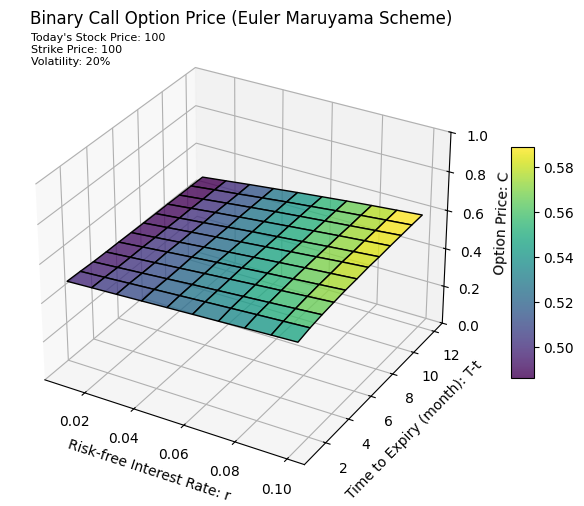

In [42]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for plotting
X, Y = np.meshgrid(df_Euler_Maruyama_bi_rate_time.columns, df_Euler_Maruyama_bi_rate_time.index) 
Z = df_Euler_Maruyama_bi_rate_time.values
# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Add labels and title
ax.set_xlabel('Risk-free Interest Rate: r')
ax.set_ylabel('Time to Expiry (month): T-t')
ax.set_zlabel('Option Price: C')
ax.set_zlim(0, 1)  # Set z-axis range: Min=0, Max=1
ax.set_title('Binary Call Option Price (Euler Maruyama Scheme)')
ax.text2D(0.045, 0.93, "Today's Stock Price: 100\nStrike Price: 100\nVolatility: 20%",
          transform=ax.transAxes, ha='left', fontsize=8)
# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

# Store the figure on the go
list_bi_figures.append(fig)

# Show the plot
plt.show()

<b> Task 10: Visualize impacts from risk-free interest rate and strike price to Binary call option price.</b><br>
Create the simulation dataframe.

In [43]:
df_Euler_Maruyama_bi_rate_strike = pd.DataFrame([[Euler_Maruyama_bi_price(S0, rate_varied, sigma, T, n, N, E_varied) for E_varied in list_strike] for rate_varied in list_rate],
                                               index=list_rate,
                                               columns=list_strike)
df_Euler_Maruyama_bi_rate_strike

80        85        95        100       105       110       115  \
0.01  0.849572  0.771387  0.578922  0.478135  0.383169  0.297688  0.225573   
0.02  0.851655  0.777533  0.592432  0.492756  0.397853  0.312223  0.238786   
0.03  0.853643  0.783722  0.604762  0.507465  0.412760  0.326594  0.252025   
0.04  0.854862  0.789269  0.616404  0.521161  0.428301  0.340811  0.264111   
0.05  0.854670  0.792916  0.627811  0.535000  0.442826  0.355826  0.278472   
0.06  0.854218  0.795829  0.639364  0.547956  0.456841  0.370179  0.292192   
0.07  0.853457  0.799173  0.649757  0.560835  0.470728  0.384696  0.306021   
0.08  0.851621  0.801320  0.658311  0.572821  0.484590  0.398786  0.319712   
0.09  0.849636  0.803172  0.667279  0.583810  0.497626  0.413353  0.333804   
0.10  0.846674  0.804292  0.675081  0.594650  0.510925  0.427101  0.347955   

           120  
0.01  0.167061  
0.02  0.177867  
0.03  0.188878  
0.04  0.200863  
0.05  0.213028  
0.06  0.225393  
0.07  0.237844  
0.08  0.249998  
0.09  0.263121  
0.10  0.276301

Visulize the result in the 3D space.

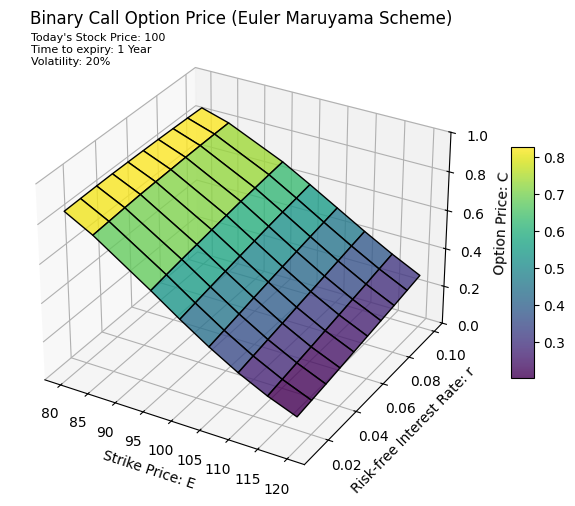

In [44]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for plotting
X, Y = np.meshgrid(df_Euler_Maruyama_bi_rate_strike.columns, df_Euler_Maruyama_bi_rate_strike.index) 
Z = df_Euler_Maruyama_bi_rate_strike.values
# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Add labels and title
ax.set_xlabel('Strike Price: E')
ax.set_ylabel('Risk-free Interest Rate: r')
ax.set_zlabel('Option Price: C')
ax.set_zlim(0, 1)  # Set z-axis range: Min=0, Max=1
ax.set_title('Binary Call Option Price (Euler Maruyama Scheme)')
ax.text2D(0.045, 0.93, "Today's Stock Price: 100\nTime to expiry: 1 Year\nVolatility: 20%",
          transform=ax.transAxes, ha='left', fontsize=8)
# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

# Store the figure on the go
list_bi_figures.append(fig)

# Show the plot
plt.show()

<b> Task 11: Visualize impacts from risk-free interest rate and volatility to Binary call option price.</b><br>
Create the simulation dataframe.

In [45]:
df_Euler_Maruyama_bi_rate_volatility = pd.DataFrame([[Euler_Maruyama_bi_price(S0, rate_varied, sigma_varied, T, n, N, E) for rate_varied in list_rate] for sigma_varied in list_volatility],
                                               index=list_volatility,
                                               columns=list_rate)
df_Euler_Maruyama_bi_rate_volatility

0.01      0.02      0.03      0.04      0.05      0.06      0.07  \
0.05  0.566596  0.635120  0.697653  0.751212  0.795266  0.829299  0.854315   
0.10  0.517657  0.551313  0.583636  0.613704  0.643231  0.669265  0.693235   
0.15  0.494243  0.515535  0.535802  0.556191  0.575180  0.592700  0.609758   
0.20  0.478135  0.492756  0.507465  0.521161  0.535000  0.547956  0.560835   
0.25  0.464710  0.475406  0.485805  0.496584  0.506787  0.516369  0.526346   
0.30  0.452750  0.460870  0.468851  0.476821  0.484775  0.492402  0.500145   
0.35  0.440780  0.447784  0.454033  0.460381  0.466131  0.472191  0.478271   
0.40  0.429345  0.434875  0.440650  0.445595  0.450322  0.455004  0.459568   

          0.08      0.09      0.10  
0.05  0.870213  0.879704  0.883311  
0.10  0.715240  0.733951  0.750916  
0.15  0.626907  0.642174  0.655754  
0.20  0.572821  0.583810  0.594650  
0.25  0.535638  0.544292  0.553064  
0.30  0.506865  0.514068  0.520996  
0.35  0.483953  0.489831  0.494702  
0.40  0.464244  0.468874  0.473049

Visulize the result in the 3D space.

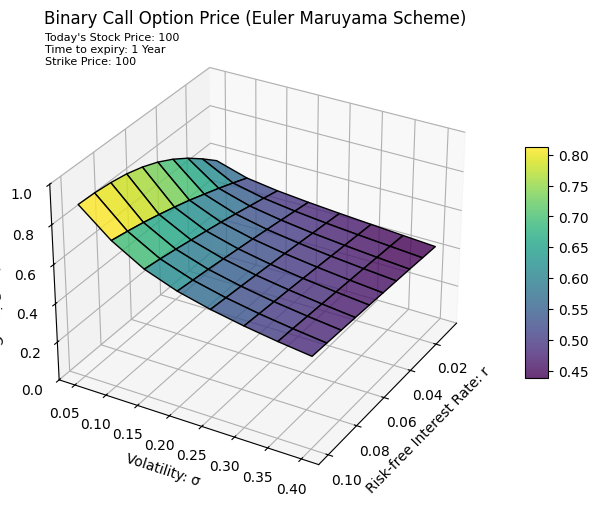

In [46]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for plotting
X, Y = np.meshgrid(df_Euler_Maruyama_bi_rate_volatility.columns, df_Euler_Maruyama_bi_rate_volatility.index) 
Z = df_Euler_Maruyama_bi_rate_volatility.values
# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Add labels and title
ax.set_xlabel('Risk-free Interest Rate: r')
ax.set_ylabel('Volatility: σ')
ax.set_zlabel('Option Price: C')
ax.set_zlim(0, 1)  # Set z-axis range: Min=0, Max=1
ax.set_title('Binary Call Option Price (Euler Maruyama Scheme)')
ax.text2D(0.045, 0.93, "Today's Stock Price: 100\nTime to expiry: 1 Year\nStrike Price: 100",
          transform=ax.transAxes, ha='left', fontsize=8)

# Rotate the plot around z-axis
ax.view_init(elev=30, azim=30) 

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

# Store the figure on the go
list_bi_figures.append(fig)

# Show the plot
plt.show()

<b> Task 12: Visualize impacts from volatility and strike price to Binary call option price.</b><br>
Create the simulation dataframe.

In [47]:
df_Euler_Maruyama_bi_volatility_strike = pd.DataFrame([[Euler_Maruyama_bi_price(S0, r, sigma_varied, T, n, N, E_varied) for E_varied in list_strike] for sigma_varied in list_volatility],
                                               index=list_volatility,
                                               columns=list_strike)
df_Euler_Maruyama_bi_volatility_strike

80        85        95        100       105       110       115  \
0.05  0.951229  0.951210  0.930179  0.795266  0.476119  0.166998  0.032028   
0.10  0.947929  0.933689  0.792859  0.643231  0.463030  0.293235  0.163260   
0.15  0.913703  0.867160  0.692571  0.575180  0.452937  0.336802  0.238901   
0.20  0.854670  0.792916  0.627811  0.535000  0.442826  0.355826  0.278472   
0.25  0.794134  0.730449  0.583712  0.506787  0.433390  0.363855  0.300246   
0.30  0.740608  0.679216  0.549658  0.484775  0.423373  0.365786  0.312422   
0.35  0.694645  0.637476  0.521835  0.466131  0.413642  0.364711  0.318747   
0.40  0.654921  0.601605  0.498777  0.450322  0.403883  0.361467  0.321611   

           120  
0.05  0.003558  
0.10  0.080455  
0.15  0.161148  
0.20  0.213028  
0.25  0.245189  
0.30  0.264432  
0.35  0.277293  
0.40  0.284693

Visulize the result in the 3D space.

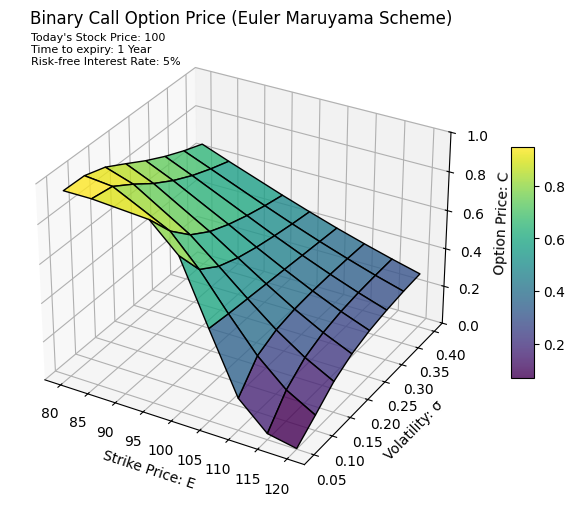

In [48]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for plotting
X, Y = np.meshgrid(df_Euler_Maruyama_bi_volatility_strike.columns, df_Euler_Maruyama_bi_volatility_strike.index) 
Z = df_Euler_Maruyama_bi_volatility_strike.values
# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Add labels and title
ax.set_xlabel('Strike Price: E')
ax.set_ylabel('Volatility: σ')
ax.set_zlabel('Option Price: C')
ax.set_zlim(0, 1)  # Set z-axis range: Min=0, Max=1
ax.set_title('Binary Call Option Price (Euler Maruyama Scheme)')
ax.text2D(0.045, 0.93, "Today's Stock Price: 100\nTime to expiry: 1 Year\nRisk-free Interest Rate: 5%",
          transform=ax.transAxes, ha='left', fontsize=8)
# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

# Store the figure on the go
list_bi_figures.append(fig)

# Show the plot
plt.show()

**[Back to Menu](#menu)**

<a id="2134"></a>
#### 2.1.3.4 Binary call option price with varied parameters - analysis and observation ####

Put all six images from the Euler-Maruyama Scheme together and label them as Figures 7 to 12 to facilitate subsequent analysis.


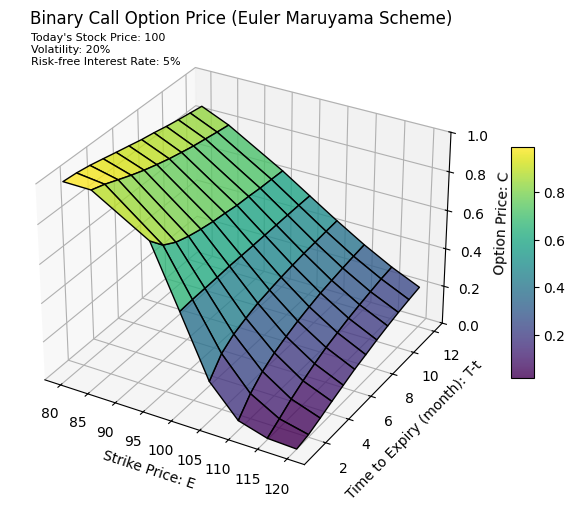
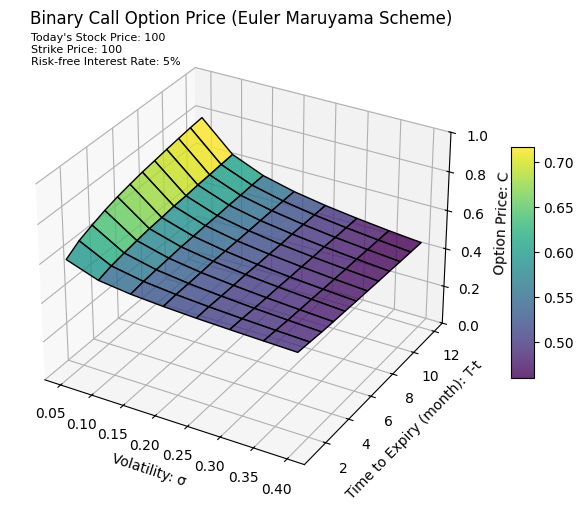
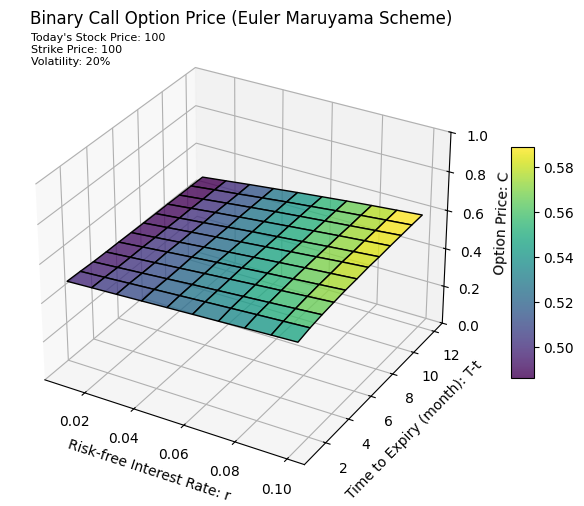
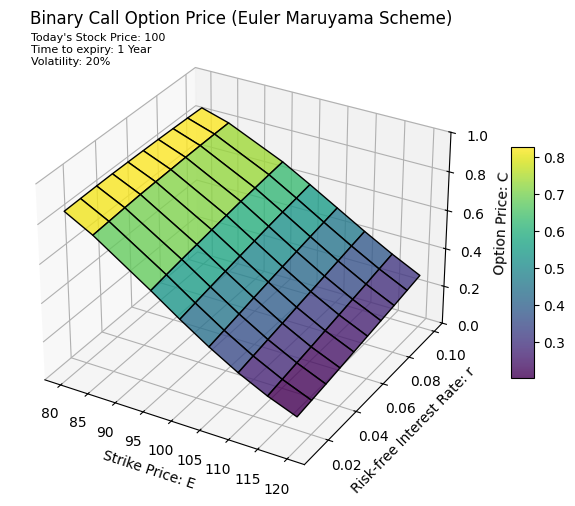
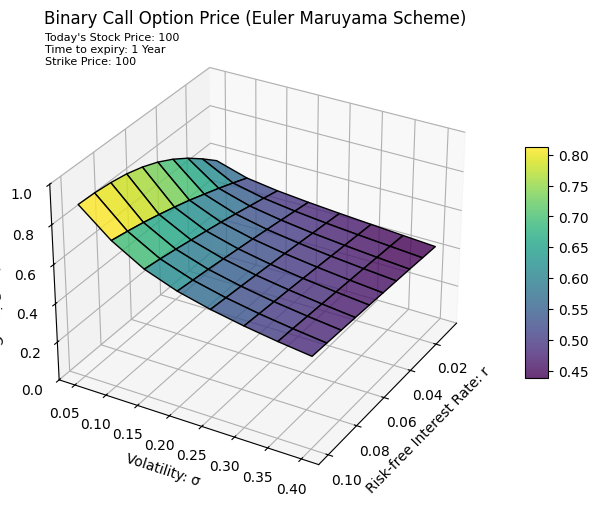
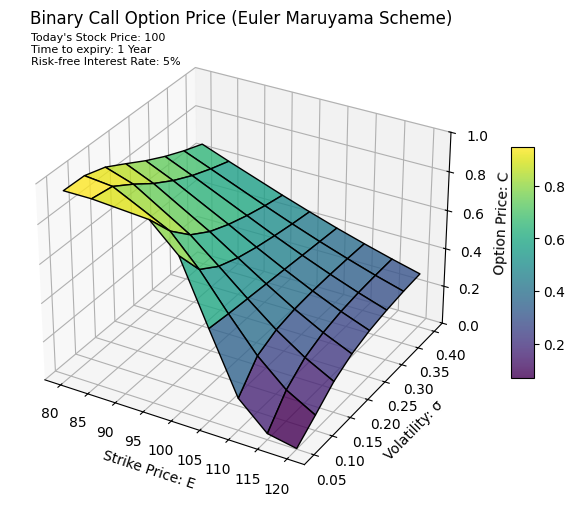

In [49]:
#add captions for each figure for the ease in the discussion
captions = [f"Figure {i+7}" for i in range(len(list_bi_figures))]

# Arrange the 6 images into 2x3 layout
rows = []

for i in range(0, len(list_bi_figures), 3):
    row = ''.join([fig_to_html_combined(fig, captions[j]) for j, fig in enumerate(list_bi_figures[i:i+3], start=i)])
    rows.append(f"<div style='display:flex; justify-content:center'>{row}</div>")

# Display HTML
display(HTML(''.join(rows)))

Recall the Black-Scholes formula for Binary call options:
$$ C = e^{-r(T-t)}N(d_2)$$
where
$$d_2 = \frac{log(\frac{S_0}{E}) + (r-\frac{{\sigma}^2}{2})(T-t)}{{\sigma}{\sqrt{T-t}}}$$
N(⋅) is the cumulative distribution function (CDF) of the standard normal distribution. <br>
Referring this formula, I will analyze one parameter at a time and display the corresponding figures before each analysis. 

<b>For strik price $E$:</b>


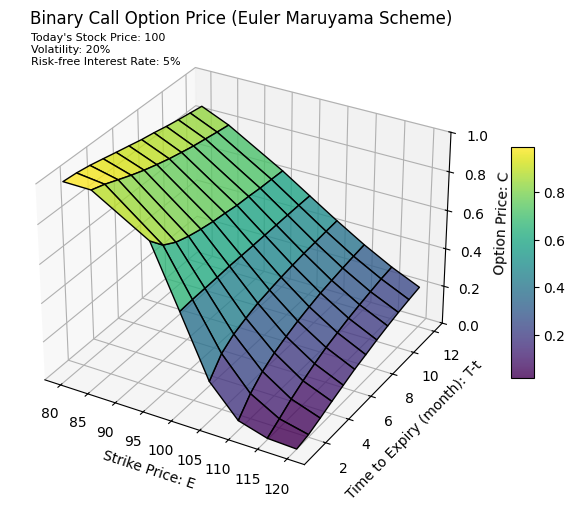
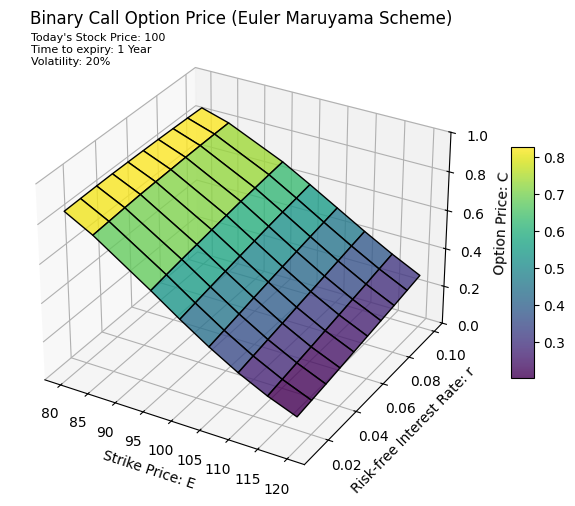
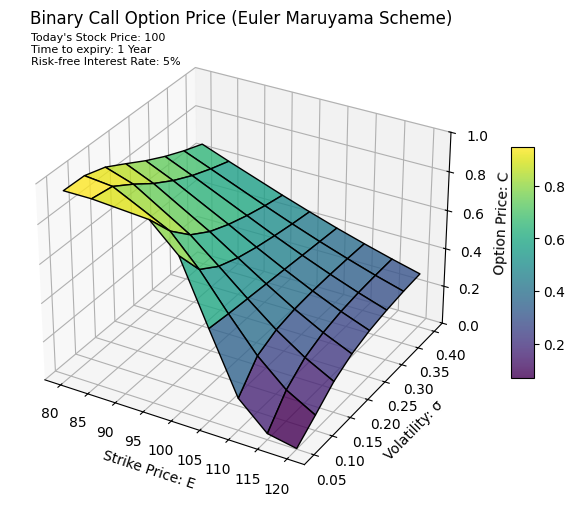

In [50]:
#Display the figures relevant to strike price
selected_indices = [0, 3, 5]

# Add captions for each selected figure
captions = [f"Figure {i+7}" for i in selected_indices]

# Create HTML for the selected figures only
rows = ''.join([fig_to_html_combined(list_bi_figures[i], captions[j]) for j, i in enumerate(selected_indices)])

# Wrap the selected figures in a single row layout
html = f"<div style='display:flex; justify-content:center'>{rows}</div>"
display(HTML(html))

1. <b>Negative relevancy between $E$ and $C$:</b> When strike price $E$ increases and other parameters remain the same, $log(\frac{S_0}{E})$ decreases, thus $d_2$ and $N(d_2)$ decrease, and so does $C$, meaning a negative relevancy between $E$ and $C$. As shown in Figure 7, 10, 12, the slopes between $E$ and $C$ are consistently negative.
2. <b>Impact of size of $E$:</b> Following bullet point 1, as $C$ decreases with $N(d_2)$, a standard normal CDF, it has fastst reduction when $d_2$ is near zero, shortly after $log(\frac{S_0}{E})$ turns negative where $E = S_0$. Thus the negative relavancy between $E$ and $C$ will become strongest somewhere after $E$ exceeds $S_0$. In Figure 7, 10, 12, the steepest slopes occur when $E\approx105$.
3. <b>Impact of $(T-t)$:</b> If time to expiry $(T-t)$ is not constant and increases, $d_2$ tend to increase and be less impacted by $log(\frac{S_0}{E})$. While $e^{-r(T-t)}$ decreases, its impact on $C$ is small. As $(T-t)$ increases, the negative relavancy between $E$ and $C$ weakens. This is shown in Figure 1, where the slopes gradually flatten.
4. <b>Impact of $r$:</b> If risk-free interest rate $r$ is not constant, $d_2$ tend to increase and will be less impacted by $log(\frac{S_0}{E})$ as well. Except that the impact of change of $r$ is usually small. Thus the increase of $r$ slightly dampens the negative relevancy between $E$ and $C$, as indicated in Figure 10 by the slopes that flatten in a subtle way.</b>
5. <b>Impact of $\sigma$:</b> If volatility $\sigma$ is not constant and increases, as it majorly affects $d_2$ as a divosor, its increase makes $d_2$ larger when $d_2<0$ and smaller when $d_2>0$. Thus, an increasing $\sigma$ initially strenghtens the negative relevancy between $E$ and $C$, then weaken, and the turning point is when $d_2=0$, somewhere after $E$ exceeds $S_0$. In Figure 12, the slopes steepen for smaller $E$ and flatten for larger $E$, showing a general reduction in curvature.
6. <b>In summary, for Binary call options, strike price $E$ and option price $C$ are negatively relevant. But the negative relevancy will weaken when strike price $E$ itself, time to expiry $(T-t)$, risk-free interest rate $r$ increases. It will strengthen first and then weaken when volatility $\sigma$ increase.</b>

<b>For volatility $\sigma$:</b>


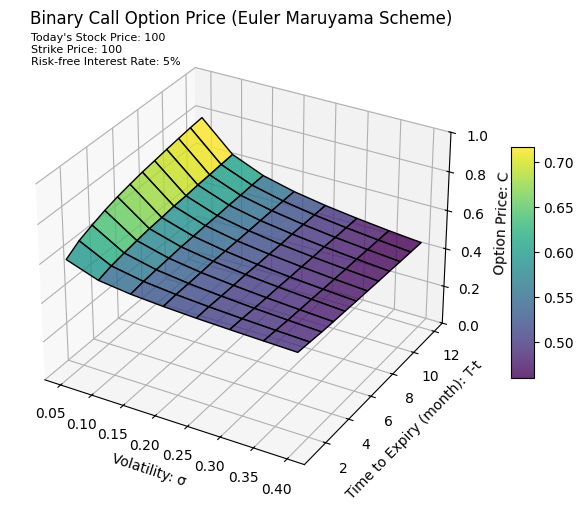
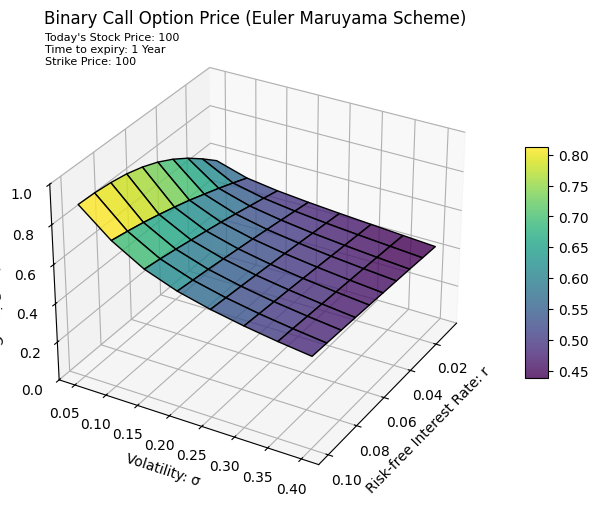
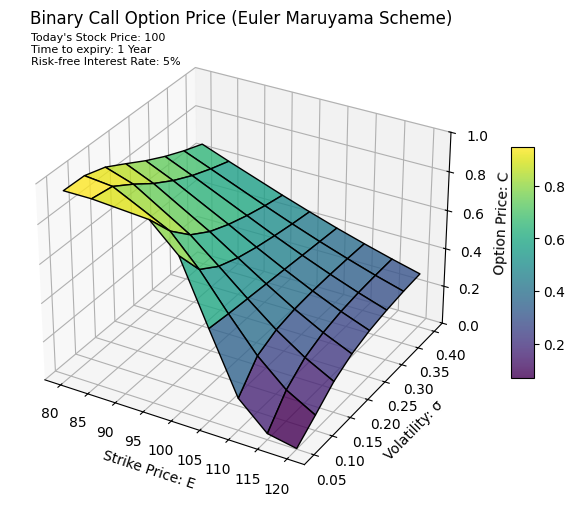

In [51]:
#Display the figures relevant to volitility
selected_indices = [1, 4, 5]

# Add captions for each selected figure
captions = [f"Figure {i+7}" for i in selected_indices]

# Create HTML for the selected figures only
rows = ''.join([fig_to_html_combined(list_bi_figures[i], captions[j]) for j, i in enumerate(selected_indices)])

# Wrap the selected figures in a single row layout
html = f"<div style='display:flex; justify-content:center'>{rows}</div>"
display(HTML(html))

Consider the sensivity of Binary call option price $C$ to volativity $\sigma$: 
$$\nu = -e^{-r(T-t)} N'(d_2)\frac{d_1}{\sigma}.$$
where $$d_1 = \frac{log(\frac{S_0}{E}) + (r+\frac{{\sigma}^2}{2})(T-t)}{{\sigma}{\sqrt{T-t}}}$$
1. <b>Relevancy between $\sigma$ and $C$ depends on $d_1$: </b> The relationship between volatility $\sigma$ and option price $C$ depends on the sign of $d_1$. If $d_1<0$, $\nu$ is positive and the relevancy is positive; if $d_1>0$, $\nu$ is negative and the relevancy is negative. Figure 2, 5, 6 only illustrate some specific scenarios.
2. <b>Impact of $(T-t)$:</b> Time to expiry $(T-t)$ is always positive, thus cannot directly determine whether $d_1$ is positive or negative. But $(T-t)$ amplifies $\sigma$’s impact. If $d_1<0$, the increasing $(T-t)$ enhances the positive relevancy; if $d_1>0$, it strengthens the negative relevancy. Figure 8 shows the latter, and the slopes between $\sigma$ and $C$ are steeper as $(T-t)$ increases.
3. <b>Impact of $r$:</b> Risk-free interest rate $r$ is always positive too, and it will make $d_1$ bigger. Therefore, if $d_1<0$, the increasing $(T-t)$ reduces the positive relevancy; if $d_1>0$, it stregthens the negative relevancy. Figure 11 shows the latter, and the slope between $\sigma$ and $C$ steepens as $r$ increases.
4. <b>Impact of $E$:</b> Strike price $E$ can be either positive or negative, therefore it is the key factor to affect the sign of $d_1$. When $E$ is small, $log(\frac{S_0}{E})$ is positive, making $d_1>0$, then $\nu$ is negative, so $\sigma$ and $C$ are negatively relevant. When $E$ increases, epecially when it outgrows $S_0$, making $log(\frac{S_0}{E})$ and even $d_1$ negative, $\sigma$ and $C$ are positively relevant. Figure 12 shows this change.
5. <b>In summary, for Bianry call options, volatility $\sigma$ and option price $C$ are negatively relevant when $E$ is small and become positively relevant as $E$ increases. While $(T-t)$ will amplify the relevancy, $r$ dampens the relevancy when it's positive, strengthens it when it's negative.</b>

<b>For time to expiry $(T-t)$:</b>


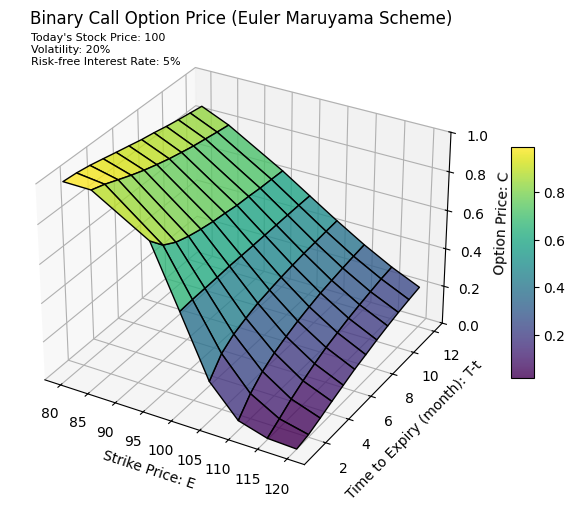
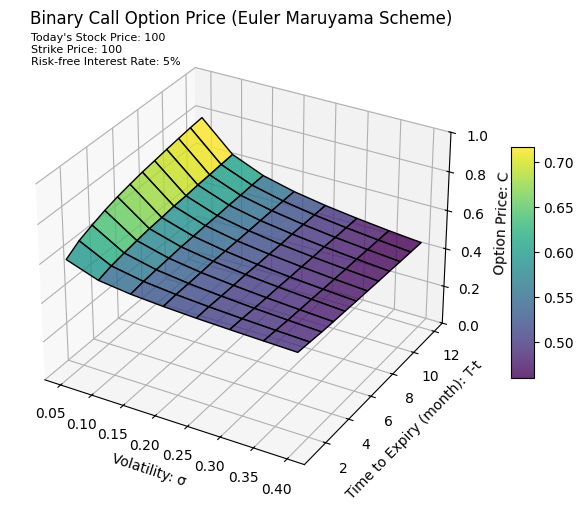
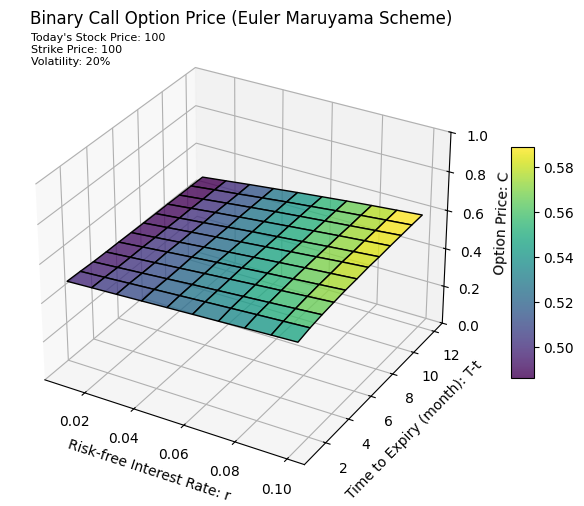

In [52]:
#Display on the figures time to expiry:
selected_indices = [0, 1, 2]

# Add captions for each selected figure
captions = [f"Figure {i+7}" for i in selected_indices]

# Create HTML for the selected figures only
rows = ''.join([fig_to_html_combined(list_bi_figures[i], captions[j]) for j, i in enumerate(selected_indices)])

# Wrap the selected figures in a single row layout
html = f"<div style='display:flex; justify-content:center'>{rows}</div>"
display(HTML(html))

The sensivity of Binary call option price $C$ to time to expiry $(T-t)$ is $\Theta$. It's a complicated formula and we won't include it in the discussion.
1. <b>Uncertain relationship between $(T-t)$ and $C$: </b> It's challenging to conclude relationship between time to expiry $(T-t)$ and option price $C$ from $\Theta$, but Figure 7 shows that when strike price $E$ is small, it's negative; when $E$ increases and exceeds $S_0$, it becomes positive. Figure 8 also shows that as volatility $\sigma$ increases, it turns from positive to negative. Therefore there is no fixed relationship between $(T-t)$ and $C$, and it depends on other parameters.
2. <b>Impact of $E$: </b> As previously discussed, strike price $E$ can determine the relationship between $(T-t)$ and $C$. Low $E$ leads to negative relevancy, and vice versa.
3. <b>Impact of $\sigma$: </b>Similarly, volatility $\sigma$ determines the relationship between $(T-t)$ and $C$. Low $\sigma$ leads to positive relevancy, and vice versa.
4. <b>Impact of $r$: </b> From Figure 9, it seems that risk-free interest rate $r$ has little impact to the the relationship between $(T-t)$ and $C$. Upon reviewing the orginal dataframe, $r$ also influences the relationship between $(T-t)$ and $C$. Low $r$ leads to negative relevancy, and vice versa.
5. <b>In summary, for Binary call options, time to expiry $(T-t)$ and option price $C$ don't have a fixed relationship. Strike price $E$ has the largest impact while low $E$ leads to negative relevancy, and vice versa; volatility $\sigma$ has moderate impact while low $\sigma$ leads to positive relevancy, and vice versa; risk-free interest rate $r$ has the smallest impact while low $r$ leads to negative relevancy, and vice versa.</b>

<b>For risk-free interest rate $r$:</b>


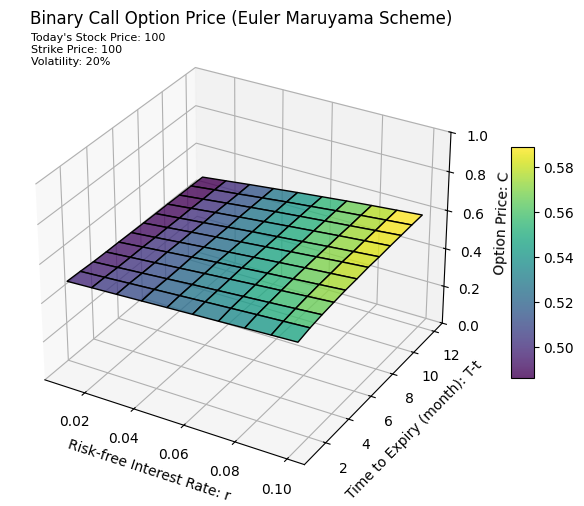
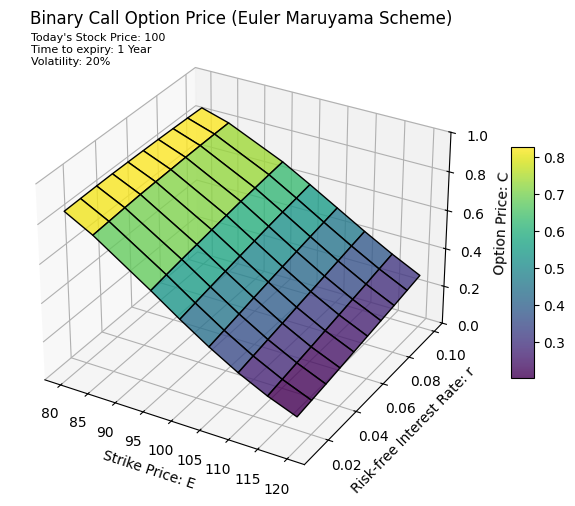
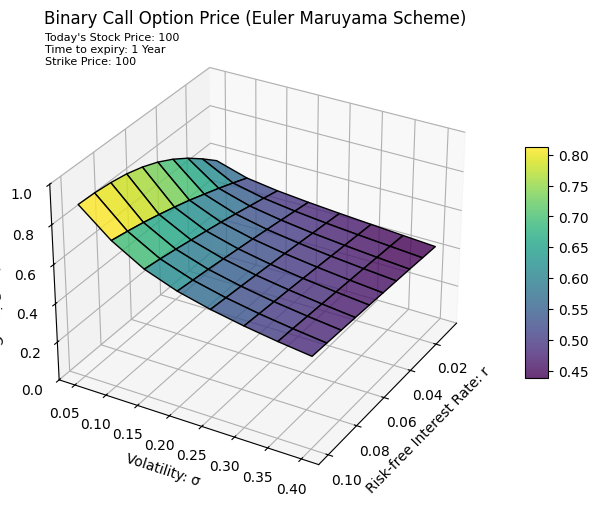

In [53]:
#Display on the figures relevant to risk-free interest rate:
selected_indices = [2, 3, 4]

# Add captions for each selected figure
captions = [f"Figure {i+7}" for i in selected_indices]

# Create HTML for the selected figures only
rows = ''.join([fig_to_html_combined(list_bi_figures[i], captions[j]) for j, i in enumerate(selected_indices)])

# Wrap the selected figures in a single row layout
html = f"<div style='display:flex; justify-content:center'>{rows}</div>"
display(HTML(html))

Consider the sensivity of Binary call option price $C$ to risk-free interest rate $r$: $$\rho = -(T-t) e^{-r(T-t)} N(d_2) + e^{-r(T-t)} N'(d_2)\frac{\sqrt{T-t}}{\sigma}$$
1. <b>Positive relevancy between $r$ and $C$: </b> With $(T-t)<1$, the term $\frac{\sqrt{T-t}}{\sigma}$ is reletively large, As a result, $e^{-r(T-t)} N'(d_2)\frac{\sqrt{T-t}}{\sigma}$ should dominate the calculation of $\rho$. This means risk-free interest rate $r$ and optin price $C$ are positively relevant as $\rho > 0$. In figure 9, 10, 11, the slopes between $r$ and $C$ always go upwards.
2. <b>Impact of $(T-t)$: </b> If time to expiry $(T-t)$ increases, the amplification from $\frac{\sqrt{T-t}}{\sigma}$ grows more significantly than other terms, leading to the assumption that $(T-t)$ stregthens the positive relevancy between $r$ and $C$. Figure 9 and its source dataframe validate this assumption by showing the positive slopes between $r$ and $C$ moderately steepen as $(T-t)$ increases. 
3. <b>Impact of $E$: </b>If strike price $E$ increases, $log(\frac{S_0}{E})$ will decrese, and so will $d_2$ and $N(d_2)$. But $N'(d_2)$ may or may not decrease and should be less affected than $N(d_2)$. This suggests that $\rho$ increases, and the positive relevancy between $r$ and $C$ is strengthened. In Figure 10, increasing $E$ steepens the positive slopes.
4. <b>Impact of $\sigma$: </b>If volatility $\sigma$ increases, $d_2$ and $N(d_2)$ will decrease. Still $N'(d_2)$ may or may not decrease but its significant multiplier $\frac{\sqrt{T-t}}{\sigma}$ becomes smaller. Consequently, $-(T-t) e^{-r(T-t)} N(d_2)$ will dominate the calculation of $\rho$, and $\rho$ will decrease. Therefore, an increasing $\sigma$ weakens the positive relevancy between $r$ and $C$. In Figure 11, when $\sigma$ increases, the positive slopes tend to flatten.
5. <b>In summary, for Binary call options, when time to expiry $(T-t) < 1$, risk-free interest rate $r$ and option price $C$ are positively relevant. And the positive relevancy will be strengthened when time to expiry $(T-t)$ or strike price $E$ increases, but weakened when volatility $\sigma$ increases.</b>

**[Back to Menu](#menu)**

<a id="22"></a>
## 2.2. Stock price simulation with Milstein scheme ##

<a id="221"></a>
### 2.2.1 Set up the simulation framework (Milstein) ###

On the other hand, in the consideration for Milstein scheme<sup>[[2](#ref2)][[3](#ref3)]</sup>, we include $\dfrac{1}{2}{\sigma}^2(dW_{t}^2 - dt)$, a correction term that accounts for the derivative of the diffusion coefficient. This will make it more accurate. Then the geometric Brownian motion with a stochastic differential equation becomes:
$$ dS_{t} = rS_{t}dt + σS_{t}dW_{t} + \dfrac{1}{2}{\sigma}^2(dW_{t}^2 - dt)$$
With the substitution of $dW_t = {\sqrt{{\delta}t}} w_{t}$, the discretization of the SDE will be:
$$ S_{t+{\delta}t} = S_t * (1 + {r {\delta}t + {\sigma} {\sqrt{{\delta}t}} w_{t} + \dfrac{1}{2}{\sigma}^2{\delta}t(w_{t}^2 - 1))} $$

The variable $w$ is a standard normally distributed random variable, $0 < {\delta}t < T$, time interval. It also holds $0 < t ≤ T$ with $T$ the final time horizon.

Define the Milstein simulation function, this will directly return an array as well:

In [54]:
def Milstein_simulation(spot, mu, sigma, horizon, time_steps, sim_times):
    
    # set random seed
    np.random.seed(seed)

    # define dt
    dt = horizon/time_steps
    
    # simulate path
    S = np.zeros((time_steps,sim_times))
    S[0] = spot
    
    for i in range(0, time_steps-1):
        w = np.random.standard_normal(sim_times)
        S[i+1] = S[i] * (1+ mu*dt + sigma*np.sqrt(dt)*w + 0.5*sigma**2*dt*(w**2-1))
    
    return S

We will similate and put the result in a dataframe 'Milstein_simulation'.

In [55]:
df_Milstein_simulation = pd.DataFrame(Milstein_simulation(S0,r,sigma,T,n,N))

Check the simulation data:

In [56]:
df_Milstein_simulation.head()

0           1           2           3           4           5      \
0  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1  101.064368   98.703717  100.492748   98.887227   97.722060  100.939610   
2  100.698662   96.589002   98.710053   97.281596   97.144357  100.965495   
3  100.526644   98.843270  100.218286   96.392916   96.991592   99.332896   
4  101.502239   98.218367  101.324857   98.033434   97.405928   99.475864   

        6           7           8           9      ...       99990  \
0  100.000000  100.000000  100.000000  100.000000  ...  100.000000   
1   99.519651  100.938847   98.723025   98.784623  ...  101.393619   
2   98.133854  101.850974  101.310531   97.852667  ...  101.131117   
3   98.498215  102.897387  100.947610   98.532760  ...   97.762695   
4   96.718368  103.175457   99.857397   98.623534  ...   96.666758   

        99991       99992       99993       99994       99995       99996  \
0  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1   96.027489  102.727062  100.094451   99.651828   99.274543  100.519972   
2   94.953450  102.731927   97.431691  100.434354  100.522341   99.228647   
3   96.604671  103.620113   96.263455  100.395325  100.211450  100.380227   
4   96.449697  101.656659   98.682449  101.530740  101.588634   98.925033   

        99997       99998       99999  
0  100.000000  100.000000  100.000000  
1   98.983883  100.599300  102.441149  
2   97.921072  101.246412  102.991970  
3   96.502089  101.253072  100.904104  
4   96.413108  100.467558   97.710914  

[5 rows x 100000 columns]

Visualization in histogram and path illustraion.

<Axes: >

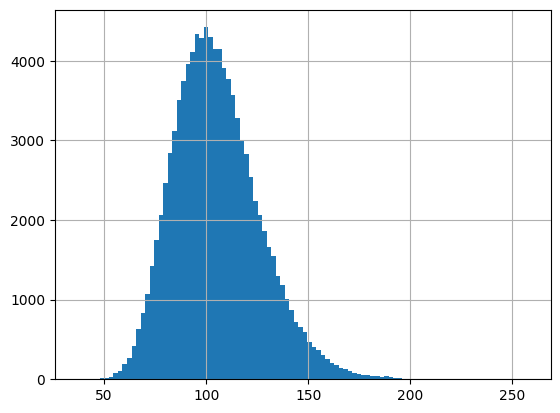

In [57]:
df_Milstein_simulation.iloc[-1].hist(bins=100)

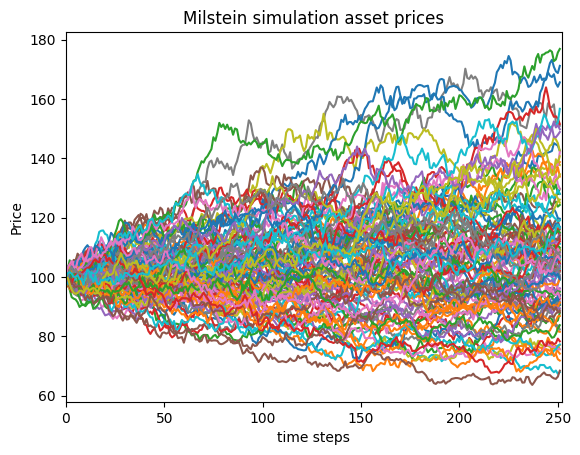

In [58]:
plt.plot(df_Milstein_simulation.iloc[:,:100])
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('Price')
plt.title('Milstein simulation asset prices');

**[Back to Menu](#menu)**

<a id="222"></a>
### 2.2.2 Calcualte the option prices with default parameters (Milstein) ###

<a id="2221"></a>
#### 2.2.2.1 European call option price and standard error with the default parameters ###

In [59]:
#simulate again to have the result in an array
S_MS_default = Milstein_simulation(S0,r,sigma,T,n,N)

In [60]:
#calculate the payoff of the simulations
Payoff_eu_MS_default = np.maximum(0, S_MS_default[-1]-E)

In [61]:
#use the average payoff as the expected payoff and substitute it in the option price function
C_eu_MS_default = np.exp(-r*T) * np.mean(Payoff_eu_MS_default)
print(f"With Milstein simulation and the default parameters, the European call option value is {C_eu_MS_default:0.4f}.")

With Milstein simulation and the default parameters, the European call option value is 10.4800.


In [62]:
#calculate the standard error
O_eu_MS_default = np.std(np.exp(-r*T)*Payoff_eu_MS_default)/np.sqrt(N)
print(f"With Milstein simulation and the default parameters, the European call option standard error is {O_eu_MS_default:0.5f}.")

With Milstein simulation and the default parameters, the European call option standard error is 0.04645.


<a id="2222"></a>
#### 2.2.2.2 Binary call option price with the default parameters ####

In [63]:
#calculate the payoff of the simulations
Payoff_bi_MS_default = np.where(S_MS_default[-1] > E, 1, 0)

In [64]:
#substitute the average payoff in the option price function
C_bi_MS_default = np.exp(-r*T) * np.mean(Payoff_bi_MS_default)
print(f"With Milstein simulation and the default parameters, the Binary call option value is {C_bi_MS_default:0.4f}.")

With Milstein simulation and the default parameters, the Binary call option value is 0.5349.


In [65]:
#calculate the standard error
O_bi_MS_default = np.std(np.exp(-r*T)*Payoff_bi_MS_default)/np.sqrt(N)
print(f"With Milstein simulation and the default parameters, the Binary call option standard error is {O_bi_MS_default:0.6f}.")

With Milstein simulation and the default parameters, the Binary call option standard error is 0.001492.


<a id="223"></a>
### 2.2.3 Further analysis with varied parameters (Milstein) ###

I repeated all the tests of varying the parameters under Milstein scheme, and not surprisingly, the results are highly similar to that under Euler Maruyama scheme, and they won't provide any new insights. <br>
Consuquently, I decide to drop the code of varying the parameters under Milstein scheme for a better reading experience, and focus on other analysis.

**[Back to Menu](#menu)**

<a id="23"></a>
## 2.3 Stock price simulation with closed form solution ##

<a id="231"></a>
### 2.3.1 Set up the simulation framework (closed form) ###

Under the risk-neutral measure (with $\mu=r$), the stock price at expiry T is
$$S_T = S_0e^{(r-\frac{{\sigma}^2}{2})T + {\sigma}{\sqrt{T}}W}$$
where $W$ is a standard normally distributed random variable.

Define the clased form calculation function, this will directly return an array as well:

In [66]:
def Closed_Form_simulation(spot, mu, sigma, horizon, sim_times):
    
    np.random.seed(seed)

    W = np.random.standard_normal(sim_times)
    
    S = spot * np.exp((r - 0.5 * sigma**2) * horizon + sigma * np.sqrt(horizon) * W)
    
    return S

We will similate and put the result in a array 'S_CF_default'.

In [67]:
#simulate with default parameters then save the result in an array
S_CF_default = Closed_Form_simulation(S0,r,sigma,T,N)

Check the simulation data:

In [68]:
S_CF_default

array([121.67741886,  83.60685083, 111.19874347, ...,  87.45542504,
       113.08547631, 150.84114953], shape=(100000,))

Visualization in histogram.

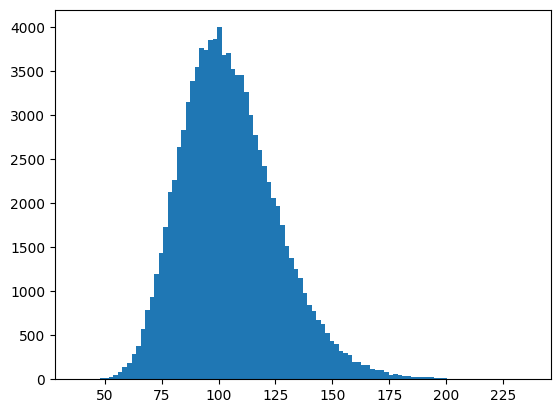

In [69]:
plt.hist(S_CF_default, bins=100)
plt.show()

**[Back to Menu](#menu)**

<a id="232"></a>
### 2.3.2 Calcualte the option prices and standard errors with default parameters (closed form) ###

<a id="2321"></a>
#### 2.3.2.1 European call option price and standard error with the default parameters. ###

In [70]:
#calculate the payoff of the simulations
Payoff_eu_CF_default = np.maximum(0, S_CF_default-E)

In [71]:
#use the average payoff as the expected payoff and substitute it in the option price function
C_eu_CF_default = np.exp(-r*T) * np.mean(Payoff_eu_CF_default)
print(f"With closed form simulation and the default parameters, the European call option value is {C_eu_CF_default:0.4f}.")

With closed form simulation and the default parameters, the European call option value is 10.4930.


In [72]:
#calculate the standard error
O_eu_CF_default = np.std(np.exp(-r*T)*Payoff_eu_CF_default)/np.sqrt(N)
print(f"With closed form simulation and the default parameters, the European call option standard error is {O_eu_CF_default:0.5f}.")

With closed form simulation and the default parameters, the European call option standard error is 0.04682.


<a id="2322"></a>
#### 2.3.2.2 Binary call option price and standard error with the default parameters ####

In [73]:
#calculate the payoff of the simulations
Payoff_bi_CF_default = np.where(S_CF_default > E, 1, 0)

In [74]:
#substitute the average payoff in the option price function
C_bi_CF_default = np.exp(-r*T) * np.mean(Payoff_bi_CF_default)
print(f"With closed form simulation and the default parameters, the Binary call option value is {C_bi_CF_default:0.4f}.")

With closed form simulation and the default parameters, the Binary call option value is 0.5309.


In [75]:
#calculate the standard error
O_bi_CF_default = np.std(np.exp(-r*T)*Payoff_bi_CF_default)/np.sqrt(N)
print(f"With closed form simulation and the default parameters, the Binary call option standard error is {O_bi_CF_default:0.6f}.")

With closed form simulation and the default parameters, the Binary call option standard error is 0.001494.


<a id="233"></a>
## 2.3.3 Further analysis with varied parameters (closed form) ###

Due to the similarity of the results, I will drop the code of varying parameters under closed form solution for a better reading experience, and focus on other analysis.

**[Back to Menu](#menu)**

<a id="24"></a>
## 2.4 Stock price calculation with Black-Scholes Model ##

To benckmark the simulations and also to echo the methodologies used in previous analysis, I will use Black-Scholes Model to calculate as well.

<a id="241"></a>
### 2.4.1 Calcualte the European call option price with default parameters (Black-Scholes Model) ###

Recall the Black-Scholes formula for European call options:
$$ C = S_0N(d_1) - Ee^{-r(T-t)}N(d_2)$$
where
$$d_1 = \frac{log(\frac{S_0}{E}) + (r+\frac{{\sigma}^2}{2})(T-t)}{{\sigma}{\sqrt{T-t}}}$$
$$d_2 = d_1 - {\sigma}{\sqrt{T-t}} $$
N(⋅) is the cumulative distribution function (CDF) of the standard normal distribution.

Substitute default parameters to calculate the European call option price.

In [76]:
d1 = (np.log(S0/E) + (r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)
C_eu_BS_default = S0*norm.cdf(d1) - E*np.exp(-r*T)*norm.cdf(d2)
print(f"With Black-Scholes Model calculation and the default parameters, the European call option value is {C_eu_BS_default:0.4f}.")

With Black-Scholes Model calculation and the default parameters, the European call option value is 10.4506.


<a id="242"></a>
### 2.4.2 Calcualte the Binary call option price with default parameters (Black-Scholes Model) ###

Recall the Black-Scholes formula for Binary call options:
$$ C = e^{-r(T-t)}N(d_2)$$
where
$$d_2 = \frac{log(\frac{S_0}{E}) + (r-\frac{{\sigma}^2}{2})(T-t)}{{\sigma}{\sqrt{T-t}}}$$
N(⋅) is the cumulative distribution function (CDF) of the standard normal distribution.


Substitute default parameters to calculate the European call option price.

In [77]:
C_bi_BS_default = np.exp(-r*T)*norm.cdf(d2)
print(f"With Black-Scholes Model calculation and the default parameters, the Binary call option value is {C_bi_BS_default:0.4f}.")

With Black-Scholes Model calculation and the default parameters, the Binary call option value is 0.5323.


**[Back to Menu](#menu)**

<a id="25"></a>
## 2.5 Summarize and compare the price results from different approaches ##

<a id="251"></a>
### 2.5.1 European call option price ###

Put all the results into one table. We will also include the 95% confidence intervals of the simulations for further sights. They are calculated based on the formula:
$$95\%\hspace{1mm}CIs = \pm1.96*standard\hspace{1mm}error$$

In [78]:
results_eu = pd.DataFrame({
    'Method': ['Euler-Maruyama MC', 'Milstein MC', 'closed form MC', 'Black-Scholes'],
    'Call Option Price': [C_eu_EM_default, C_eu_MS_default, C_eu_CF_default, C_eu_BS_default],
    'Std Error': [O_eu_EM_default, O_eu_MS_default, O_eu_CF_default, np.nan],
    '95% CI Lower': [C_eu_EM_default-1.96*O_eu_EM_default, C_eu_MS_default-1.96*O_eu_MS_default, C_eu_CF_default-1.96*O_eu_CF_default, np.nan],
    '95% CI Upper': [C_eu_EM_default+1.96*O_eu_EM_default, C_eu_MS_default+1.96*O_eu_MS_default, C_eu_CF_default+1.96*O_eu_CF_default, np.nan],
    'Abs Error vs BS': [abs(C_eu_EM_default - C_eu_BS_default), abs(C_eu_MS_default - C_eu_BS_default), abs(C_eu_CF_default - C_eu_BS_default), 0]
})

In [79]:
results_eu

Method  Call Option Price  Std Error  95% CI Lower  \
0  Euler-Maruyama MC          10.481120   0.046432     10.390114   
1        Milstein MC          10.480009   0.046452     10.388963   
2     closed form MC          10.493044   0.046822     10.401274   
3      Black-Scholes          10.450584        NaN           NaN   

   95% CI Upper  Abs Error vs BS  
0     10.572127         0.030537  
1     10.571055         0.029425  
2     10.584814         0.042461  
3           NaN         0.000000

<b>Analysis and interpretation:</b></br>
The 3 results from simulation are quite close to each other, and they are similar to our benchmark value calculated from Black-Scholes Model as well.
1. Accuracy Hierarchy:
   - Milstein (0.029425) > Euler-Maruyama (0.030537) > closed form MC (0.042461)
   - This shows that Milstein's correction term improves accuracy over Euler-Maruyama.
   - Closed form MC is not necessarily the least accurate method. This result could be caused by its high variance for payoffs.
2. Error Statistics:
   - All Monte Carlo methods have Black-Scholes price within their 95% CIs. This demostrates they have certain reliability in practice. 
   - Standard errors (~0.046) show similar precision across these methods.
3. Computational Efficiency:
   - Closed-form MC is fastest as there is only one step per path.
   - Milstein/Euler-Maruyama require path simulations (252 steps per path). 

<a id="252"></a>
### 2.5.2 Binary call option price ###

Put all the results into one table. We will also include the 95% confidence intervals of the simulations for further sights. 

In [80]:
results_bi = pd.DataFrame({
    'Method': ['Euler-Maruyama MC', 'Milstein MC', 'closed form MC', 'Black-Scholes'],
    'Call Option Price': [C_bi_EM_default, C_bi_MS_default, C_bi_CF_default, C_bi_BS_default],
    'Std Error': [O_bi_EM_default, O_bi_MS_default, O_bi_CF_default, np.nan],
    '95% CI Lower': [C_bi_EM_default-1.96*O_bi_EM_default, C_bi_MS_default-1.96*O_bi_MS_default, C_bi_CF_default-1.96*O_bi_CF_default, np.nan],
    '95% CI Upper': [C_bi_EM_default+1.96*O_bi_EM_default, C_bi_MS_default+1.96*O_bi_MS_default, C_bi_CF_default+1.96*O_bi_CF_default, np.nan],
    'Abs Error vs BS': [abs(C_bi_EM_default - C_bi_BS_default), abs(C_bi_MS_default - C_bi_BS_default), abs(C_bi_CF_default - C_bi_BS_default), 0]
})

In [81]:
results_bi

Method  Call Option Price  Std Error  95% CI Lower  \
0  Euler-Maruyama MC           0.535000   0.001492      0.532075   
1        Milstein MC           0.534867   0.001492      0.531942   
2     closed form MC           0.530929   0.001494      0.528001   
3      Black-Scholes           0.532325        NaN           NaN   

   95% CI Upper  Abs Error vs BS  
0      0.537925         0.002675  
1      0.537792         0.002542  
2      0.533857         0.001396  
3           NaN         0.000000

<b>Analysis and interpretation:</b></br>
The 3 results from simulation are quite close to each other, and they are similar to our benchmark value calculated from Black-Scholes Model as well.
1. Accuracy Hierarchy:
   - Closed form MC (0.001396) > Milstein (0.002542) > Euler-Maruyama (0.002675)
   - This shows that Milstein's correction term improves accuracy over Euler-Maruyama.
   - Closed form MC becomes the most accurate method. 
2. Error Statistics:
   - All Monte Carlo methods have Black-Scholes price within their 95% CIs. This demostrates they have certain reliability in practice. 
   - Standard errors (~0.00149) show similar precision across these methods. 
3. Computational Efficiency:
   - Closed-form MC is fastest as there is only one step per path.
   - Milstein/Euler-Maruyama require path simulations (252 steps per path). 

**[Back to Menu](#menu)**

# 3. Intreresting Observations and Problems Encountered #

<a id="31"></a>
## 3.1 Interesting Observations ##

<a id="311"></a>
### 3.1.1  Understanding and using the Greeks correctly ###

While analyzing the impacts of varied parameters on option prices, I combined simulations, Greeks derived from the Black-Scholes Model, and intuitive understandings to derive results.  

However, when examining the relationship between time to expiry $(T-t)$ and the European call option price $C$, I encountered an inconsistency:  
- $\Theta$ is negative, indicating a decrease in option value as time passes.  
- Yet, simulations showed a positive relationship between $(T-t)$ and $C$.  

Initially, I worried that the simulations might be incorrect. After thorough research, I understood the following:  
- The negative $\Theta$ signifies that the value of an individual option decreases as it approaches expiration.  
- For options with differing maturities, those with longer maturities have a higher probability of finishing in-the-money (ITM), leading to higher values. This aligns with what the simulations displayed.

This deepened my understanding of the Greeks and let me have further reflection on how to integrate them into a broader understanding of options. And better knowledge of the Greeks will help maximize their utility in future analytical and practical work.

<a id="312"></a>
### 3.1.2 Deciding the method to calculate the standard error ### 

When calculating the standard error of payoffs from the simulation results, I sought assistance from generative AI. Interestingly, different AIs provided different solutions, with the primary difference being whether to use discounted payoffs in calculating the standard error.  

Initially, I was confused, as both approaches had reasonable explanations. However, I continued researching and let the AIs to challenge each other. Eventually, I concluded that the discounted payoff should be used to calculate the standard error. This is because the purpose of Monte Carlo simulations is to estimate discounted payoffs. Thus, the standard error must align with the definition of the estimator. Without using the discount factor, the uncertainty in the price would be underestimated or overestimated.  

This experience highlights the importance of verifying and understanding results independently rather than relying on AI unconditionally.

<a id="313"></a>
### 3.1.3 Reflecting the difference between the two schemes in practice ###

After learning the definition of the Milstein scheme, I understood that its inclusion of a correction term improves accuracy and theoretically makes it perform better than the Euler-Maruyama scheme. 

However, in actual simulations, their results are often very similar, and sometimes the Euler-Maruyama scheme even outperforms Milstein. After research, I realized this is because simulations are not always the most accurate reflection of the schemes, as sampling noise and the additional term in Milstein can introduce more variance.  

To address this issue:  
- The best approach is to increase the simulation times $N$, while balancing computational efficiency.  
- Additionally, trying several different seed numbers can help encompass more possibilities.

<a id="32"></a>
## 3.2 Problems encountered ##

<a id="321"></a>
### 3.2.1 Driving results with complicated Greeks ###

While analyzing the impacts of varied parameters on option prices, I combined simulations, Greeks derived from the Black-Scholes Model, and intuitive understandings to derive results.  

In some cases, such as identifying the relationship between time to expiry $T-t$ and Binary call option price $C$, it was challenging to extract insights from the Greeks due to the high amount of uncertainties and complexities in the formula.  

As a result, in these scenarios, I primarily relied on simulations to generate insights. However, since simulations do not always perfectly reflect the full landscape, some of these results may not be entirely accurate.

<a id="322"></a>
### 3.2.2 Showing multiple figures together ###

I used illustrations to demonstrate the simulation results of the impacts of varied parameters on option prices. In many cases, I needed to display multiple figures together for a single analysis. However, I was unsure how to achieve this effectively, and my research did not yield an appropriate solution.  

As a workaround, I utilized the HTML feature in Jupyter Notebook to showcase selected figures stored in a list. But this method is a compromise and may not be compatible with other Python platforms.

**[Back to Menu](#menu)**

# 4. Conclusion #

<a id="41"></a>
## 4.1 Performance comparision between different methods ##

From the simulations with Euler-Maruyama scheme, Milstein scheme and closed form solution to calculate European and Binary call options, we can conclude that: 
1. **Milstein is usually more accurate than Euler-Maruyama due to its correction term.**
2. **Closed form is the fastest appraoch, but it has slightly higher variance for payoff calculation.**
3. **All the 3 methods can be used in practice for option pricing.**

To recap the detailed insights, please visit **[2.5 Summarize and compare the price results from different approaches](#25)**.

<a id="42"></a>
## 4.2 Impacts to option prices from varied parameters ##

The European and Binary call option prices have following relationships with the parameters:

In [82]:
df_relashipship_summary = pd.DataFrame({'Call Option Type': ['European', 'Binary'],
                                        'Strke Price: E' : ['Negative', 'Negative'],
                                        'Volatility: σ' : ['Positive', 'Negative when E is small, positive as E increases'],
                                        'Time to Expiry: T-t': ['Positive', 'Depends on other parameters'],
                                        'Risk-free Interest Rate: r' : ['Positive', 'Positive']})
pd.set_option('display.max_colwidth', None)
df_relashipship_summary

Call Option Type Strke Price: E  \
0         European       Negative   
1           Binary       Negative   

                                       Volatility: σ  \
0                                           Positive   
1  Negative when E is small, positive as E increases   

           Time to Expiry: T-t Risk-free Interest Rate: r  
0                     Positive                   Positive  
1  Depends on other parameters                   Positive

To recap the detailed insights, please visit **[2.1.3.2 European call option price with varied parameters - analysis and observation](#2132)** and **[2.1.3.4 Binary call option price with varied parameters - analysis and observation](#2134)**.

<a id="43"></a>
## 4.3 Meeting the project objectives ##

I believe this exam project has been a successful endeavor. Not only did I strive to meet the exam requirements, but I also used this opportunity to expand my knowledge, gain hands-on experience, and enhance my skills in project flow management and solution finding.  

Lastl but not least, I would like to express my heartfelt thanks to my family for their unwavering support during the exam period.

**[Back to Menu](#menu)**

<a id="5"></a>
# 5. Reference #
<a id='ref1'></a><a href='https://ocw.mit.edu/courses/15-450-analytics-of-finance-fall-2010/'>[1]15.450 Lecture 3: Monte Carlo Simulation (formula to calculate standard error)</a>

<a id='ref2'></a><a href='https://hautahi.com/sde_simulation'>[2] Numerical SDE Simulation - Euler vs Milstein Methods</a>  

<a id='ref3'></a><a href='https://advancesincontinuousanddiscretemodels.springeropen.com/articles/10.1186/s13662-018-1466-5'>[3] Numerical methods for simulation of stochastic differential equations</a>  

